# **Phân Tích và Dự Đoán Độ Trễ Hàng Không**

Trong đề tài này chúng em đã sử dụng bộ dữ liệu **"Airline On-Time Performance Dataset"** do Cục Thống kê Giao thông Vận tải (BTS) của Bộ Giao thông Vận tải Hoa Kỳ cung cấp để phân tích sự chậm trễ, hủy chuyến và chuyển hướng. Đồng thời xây dựng mô hình Linear Regression nhằm dự đoán sự chậm trễ của các hãng hàng không.

Link Dataset: [Airline On-Time Performance Dataset](https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr)


Bộ dữ liệu này cho phép phân tích toàn diện bởi nó bao gồm thông tin chi tiết về chuyến bay như lịch trình, số liệu hiệu suất, yếu tố chậm trễ, thời gian taxi, thời lượng chuyến bay, khoảng cách, hủy chuyến và chuyển hướng. Với dữ liệu này, ta có thể xác định nguyên nhân chung của
sự chậm trễ, đánh giá hiệu suất của hãng hàng không và sân bay, và hiểu được tác động của việc hủy chuyến và chuyển hướng.
Những hiểu biết sâu sắc này có thể giúp các hãng hàng không, sân bay và cơ quan quản lý đưa ra quyết định sáng suốt để cải thiện hiệu quả và hiệu suất vận tải hàng không.

## **Tổng quan Dataset:**

Bộ dữ liệu kéo dài từ tháng 1 năm 2024 đến tháng 7 năm 2024, với hơn 4 triệu bản ghi và 110 cột ghi chi tiết các hoạt động hàng không, bao gồm thời gian khởi hành và thời gian đến, sự chậm trễ, hủy chuyến, thời gian taxi, v.v.

Các biến chính:

- **FlightDate**: Ngày bay
- **DepDelay**, ArrDelay: Sự chậm trễ khi khởi hành và đến tính bằng phút
- **Cancelled**, Diverted: Các chỉ số về chuyến bay bị hủy và chuyển hướng
- **Distance**: Khoảng cách giữa sân bay xuất phát và sân bay đích


*Importing libraries and packages*


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
from datetime import datetime

warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.DtypeWarning)

In [2]:
from scipy import stats

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

**Các bước tiền xử lý dữ liệu**

- Tải các bộ dữ liệu hàng tháng từ tháng 1 năm 2024 đến tháng 7 năm 2024.
- Kết hợp các bộ dữ liệu hàng tháng thành một bộ dữ liệu duy nhất.
- Kiểm tra shape, describe, missing value và outliers sau đó xử lý chúng

**Hiểu và Chuẩn bị Dữ liệu**

Cần hiểu được ý nghĩa của các trường và chọn ra một số trường hữu ích, sau đó tiến hành tiền xử lý dữ liệu và thực hiện EDA


### *Load data*

In [3]:
df_jan = pd.read_csv('Dataset/January_2024.csv')


In [4]:
df_feb = pd.read_csv('Dataset/February_2024.csv')


In [5]:
df_mar = pd.read_csv('Dataset/March_2024.csv')


In [6]:
df_apr = pd.read_csv('Dataset/April_2024.csv')


In [7]:
df_may = pd.read_csv('Dataset/May_2024.csv')


In [8]:
df_jun = pd.read_csv('Dataset/June_2024.csv')


In [9]:
df_jul = pd.read_csv('Dataset/July_2024.csv')

### *In ra 5 hàng theo từng bộ dữ liệu và kiểm tra shape của chúng.*

In [10]:
print(df_jan.shape)
df_jan.head()

(547271, 110)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2024,1,1,8,1,2024-01-08,9E,20363,9E,N485PX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,1,1,9,2,2024-01-09,9E,20363,9E,N912XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,1,1,10,3,2024-01-10,9E,20363,9E,N918XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,1,1,11,4,2024-01-11,9E,20363,9E,N490PX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,1,1,12,5,2024-01-12,9E,20363,9E,N915XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
print(df_feb.shape)
df_feb.head()

(519221, 110)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2024,1,2,17,6,2024-02-17,9E,20363,9E,N922XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,1,2,17,6,2024-02-17,9E,20363,9E,N922XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,1,2,1,4,2024-02-01,9E,20363,9E,N920XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,1,2,2,5,2024-02-02,9E,20363,9E,N482PX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,1,2,5,1,2024-02-05,9E,20363,9E,N479PX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print(df_mar.shape)
df_mar.head()

(591767, 110)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2024,1,3,1,5,2024-03-01,9E,20363,9E,N935XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,1,3,2,6,2024-03-02,9E,20363,9E,N910XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,1,3,3,7,2024-03-03,9E,20363,9E,N298PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,1,3,4,1,2024-03-04,9E,20363,9E,N602LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,1,3,5,2,2024-03-05,9E,20363,9E,N348PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
print(df_apr.shape)
df_apr.head()

(582185, 110)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2024,2,4,1,1,2024-04-01,9E,20363,9E,N187GJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,2,4,2,2,2024-04-02,9E,20363,9E,N297PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,2,4,3,3,2024-04-03,9E,20363,9E,N605LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,2,4,4,4,2024-04-04,9E,20363,9E,N912XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,2,4,5,5,2024-04-05,9E,20363,9E,N538CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
print(df_may.shape)
df_may.head()

(609743, 110)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2024,2,5,1,3,2024-05-01,9E,20363,9E,N491PX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,2,5,2,4,2024-05-02,9E,20363,9E,N482PX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,2,5,3,5,2024-05-03,9E,20363,9E,N920XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,2,5,4,6,2024-05-04,9E,20363,9E,N932XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,2,5,5,7,2024-05-05,9E,20363,9E,N479PX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
print(df_jun.shape)
df_jun.head()

(611132, 110)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2024,2,6,7,5,2024-06-07,9E,20363,9E,N272PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,2,6,8,6,2024-06-08,9E,20363,9E,N302PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,2,6,9,7,2024-06-09,9E,20363,9E,N676CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,2,6,10,1,2024-06-10,9E,20363,9E,N301PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,2,6,11,2,2024-06-11,9E,20363,9E,N335PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
print(df_jul.shape)
df_jul.head()

(634613, 110)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2024,3,7,1,1,2024-07-01,9E,20363,9E,N935XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,3,7,2,2,2024-07-02,9E,20363,9E,N335PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,3,7,3,3,2024-07-03,9E,20363,9E,N337PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,3,7,4,4,2024-07-04,9E,20363,9E,N272PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,3,7,5,5,2024-07-05,9E,20363,9E,N146PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### *Join các dataframe trên thành một dataframe tổng.*

In [17]:
dfs = [df_jan, df_feb, df_mar, df_apr, df_may, df_jun, df_jul]
df = pd.concat(dfs, ignore_index=True)

In [18]:
print(df.shape)
df.head()

(4095932, 110)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2024,1,1,8,1,2024-01-08,9E,20363,9E,N485PX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,1,1,9,2,2024-01-09,9E,20363,9E,N912XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,1,1,10,3,2024-01-10,9E,20363,9E,N918XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,1,1,11,4,2024-01-11,9E,20363,9E,N490PX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,1,1,12,5,2024-01-12,9E,20363,9E,N915XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### *Lựa chọn các cột chứa thông tin hữu ích, từ đó tạo Dataframe theo các cột này để phân tích và dự đoán.*

In [19]:
col = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'Flight_Number_Reporting_Airline', 'Tail_Number', 'Origin', 'Dest', 'Distance', 'DistanceGroup', 'DepTime', 'CRSDepTime', 'DepDelay', 'TaxiOut', 'DepartureDelayGroups', 'DepDelayMinutes', 'ArrTime', 'CRSArrTime', 'ArrDelay', 'TaxiIn', 'ArrivalDelayGroups', 'ArrDelayMinutes', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Cancelled', 'CancellationCode', 'Diverted']

In [20]:
df = df[col]
print(df.shape)
df.head()

(4095932, 35)


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
0,2024,1,8,1,2024-01-08,9E,4801,N485PX,LGA,OMA,...,213.0,184.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
1,2024,1,9,2,2024-01-09,9E,4801,N912XJ,LGA,OMA,...,196.0,168.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
2,2024,1,10,3,2024-01-10,9E,4801,N918XJ,LGA,OMA,...,200.0,177.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
3,2024,1,11,4,2024-01-11,9E,4801,N490PX,LGA,OMA,...,223.0,188.0,0.0,0.0,4.0,0.0,23.0,0.0,NaN,0.0
4,2024,1,12,5,2024-01-12,9E,4801,N915XJ,LGA,OMA,...,226.0,185.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0


### *Tạo hàm get_df_info để in ra các trường missing value trong tập dữ liệu tổng*

In [21]:
def get_df_info(df):
    print('Dataframe Shape:', df.shape)

    missing_df = df.columns[df.isnull().sum() > 0]

    
    if missing_df.empty:
        print("No missing values found in the dataframe.")
        return None

    info_dfs = [
        pd.DataFrame(df[missing_df].dtypes).T.rename(index={0: 'column type'}),
        pd.DataFrame(df[missing_df].isnull().sum()).T.rename(index={0: 'null values:'}),
        pd.DataFrame(df[missing_df].isnull().sum() / df.shape[0] * 100).T.rename(index={0: 'null values (%)'})
    ]
    
    df_info = pd.concat(info_dfs, axis=0)
    print('Dataframe Missing Shape:', df_info.shape)
    return df_info


In [22]:
get_df_info(df)

Dataframe Shape: (4095932, 35)
Dataframe Missing Shape: (3, 20)


,Tail_Number,DepTime,DepDelay,TaxiOut,DepartureDelayGroups,DepDelayMinutes,ArrTime,ArrDelay,TaxiIn,ArrivalDelayGroups,ArrDelayMinutes,CRSElapsedTime,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CancellationCode
column type,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object
null values:,13850,64588,64816,66691,64816,64816,67995,78529,67997,78529,78529,1,78529,78529,3165422,3165422,3165422,3165422,3165422,4028894
null values (%),0.33814,1.576882,1.582448,1.628225,1.582448,1.582448,1.660062,1.917244,1.660111,1.917244,1.917244,0.000024,1.917244,1.917244,77.282094,77.282094,77.282094,77.282094,77.282094,98.363303


*Ta thấy có 20/35 cột chứa missing value, tuy nhiên việc xử lý các giá trị này sẽ được tiến hành ở bước sau*

### *Kiểm tra describe*

In [23]:
df.describe(include = 'all')

,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
count,4095932.0,4.095932e+06,4.095932e+06,4.095932e+06,4095932,4095932,4.095932e+06,4082082,4095932,4095932,...,4.017403e+06,4.017403e+06,930510.000000,930510.000000,930510.000000,930510.00000,930510.000000,4.095932e+06,67038,4.095932e+06
unique,NaN,NaN,NaN,NaN,213,15,NaN,5941,344,344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,NaN,2024-07-19,WN,NaN,N488HA,ATL,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,NaN
freq,NaN,NaN,NaN,NaN,21468,840402,NaN,1969,197317,197236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34220,NaN
mean,2024.0,4.113240e+00,1.579195e+01,3.958883e+00,NaN,NaN,2.479611e+03,NaN,NaN,NaN,...,1.420916e+02,1.159385e+02,24.757927,4.504423,13.897418,0.13632,30.491383,1.636697e-02,NaN,2.805466e-03
std,0.0,1.995333e+00,8.780413e+00,2.005959e+00,NaN,NaN,1.647358e+03,NaN,NaN,NaN,...,7.268818e+01,7.064225e+01,76.621005,34.323884,32.818808,3.42842,65.236528,1.268822e-01,NaN,5.289231e-02
min,2024.0,1.000000e+00,1.000000e+00,1.000000e+00,NaN,NaN,1.000000e+00,NaN,NaN,NaN,...,1.500000e+01,6.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,NaN,0.000000e+00
25%,2024.0,2.000000e+00,8.000000e+00,2.000000e+00,NaN,NaN,1.140000e+03,NaN,NaN,NaN,...,8.900000e+01,6.400000e+01,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,NaN,0.000000e+00
50%,2024.0,4.000000e+00,1.600000e+01,4.000000e+00,NaN,NaN,2.194000e+03,NaN,NaN,NaN,...,1.260000e+02,9.900000e+01,3.000000,0.000000,1.000000,0.00000,5.000000,0.000000e+00,NaN,0.000000e+00
75%,2024.0,6.000000e+00,2.300000e+01,6.000000e+00,NaN,NaN,3.683000e+03,NaN,NaN,NaN,...,1.730000e+02,1.460000e+02,21.000000,0.000000,17.000000,0.00000,36.000000,0.000000e+00,NaN,0.000000e+00


### *Xử lý trường thời gian*

In [24]:
df[['CRSDepTime', 'DepTime', 'CRSArrTime', 'ArrTime']]

,CRSDepTime,DepTime,CRSArrTime,ArrTime
0,856,851.0,1135,1124.0
1,856,851.0,1135,1107.0
2,856,850.0,1135,1110.0
3,856,919.0,1135,1202.0
4,856,851.0,1135,1137.0
...,...,...,...,...
4095927,2105,NaN,2240,NaN
4095928,1425,1532.0,1637,1754.0
4095929,1355,1354.0,1600,1535.0
4095930,1830,1840.0,2048,2151.0


In [25]:
def validate_int2str(col):
    try:
        if col:
            col = int(float(col))
            if (col):
                col = str(col).zfill(4)
                col = datetime.strptime(col, '%H%M').time().strftime("%I:%M %p")
            return col
        else:
            return np.nan
    except Exception as e:
        return np.nan

In [26]:
df['CRSDepTime'] = df['CRSDepTime'].apply(lambda x: validate_int2str(x))


In [27]:
df['DepTime'] = df['DepTime'].apply(lambda x: validate_int2str(x))


In [28]:
df['CRSArrTime'] = df.CRSArrTime.apply(lambda x: validate_int2str(x))


In [29]:
df['ArrTime'] = df.ArrTime.apply(lambda x: validate_int2str(x))


In [30]:
# Kiểm tra kết quả
df[['CRSDepTime', 'DepTime', 'CRSArrTime', 'ArrTime']]

,CRSDepTime,DepTime,CRSArrTime,ArrTime
0,08:56 AM,08:51 AM,11:35 AM,11:24 AM
1,08:56 AM,08:51 AM,11:35 AM,11:07 AM
2,08:56 AM,08:50 AM,11:35 AM,11:10 AM
3,08:56 AM,09:19 AM,11:35 AM,12:02 PM
4,08:56 AM,08:51 AM,11:35 AM,11:37 AM
...,...,...,...,...
4095927,09:05 PM,NaN,10:40 PM,NaN
4095928,02:25 PM,03:32 PM,04:37 PM,05:54 PM
4095929,01:55 PM,01:54 PM,04:00 PM,03:35 PM
4095930,06:30 PM,06:40 PM,08:48 PM,09:51 PM


### **Tạo các dataframe dựa trên trạng thái chuyến bay khác nhau được quan sát trong tập dữ liệu hiện tại**

1.   Các chuyến bay bị hủy (Cancelled == 1)
2.   Các chuyến bay bị chuyển hướng (Diverted == 1)
3.   Các chuyến bay bị hoãn (ArrivalDelayGroups >= 1)
4.   Các chuyến bay đúng giờ (ArrivalDelayGroups == 0)
5.   Các chuyến bay sớm (ArrivalDelayGroups < 0)

### **Chuyến bay bị hủy (Cancelled Dataframe)**

**Kiểm tra các giá trị trong Cancelled**


In [31]:
print(df['Cancelled'].unique())

[0. 1.]


**Đưa về kiểu dữ liệu int**


In [32]:
df['Cancelled'] = df['Cancelled'].astype(float).astype(int)

In [33]:
print(df['Cancelled'].unique())

[0 1]


**Số lượng chuyến bay bị hủy**

In [34]:
# lọc dữ liệu chuyến bay bị hủy
df_cancelled = df[df.Cancelled == 1]
# loại bỏ các chuyến bay bị hủy khỏi dataframe gốc
df = df[~(df.Cancelled == 1)]
# in ra số lượng chuyến bay bị hủy
print("Số lượng chuyến bay bị hủy:", df_cancelled.shape[0])

df_cancelled.head()

Số lượng chuyến bay bị hủy: 67038


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
6,2024,1,16,2,2024-01-16,9E,4801,N485PX,LGA,OMA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B,0.0
23,2024,1,15,1,2024-01-15,9E,4801,N485PX,OMA,LGA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B,0.0
60,2024,1,16,2,2024-01-16,9E,4802,N916XJ,MCI,LGA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B,0.0
63,2024,1,19,5,2024-01-19,9E,4802,N922XJ,MCI,LGA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B,0.0
99,2024,1,15,1,2024-01-15,9E,4805,N300PQ,LGA,JAX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,C,0.0


In [35]:
# Kiểm tra số lượng giá trị null trong cột CancellationCode
null_count = df_cancelled['CancellationCode'].isnull().sum()
print(f"Số lượng dữ liệu null trong cột CancellationCode: {null_count}") 

Số lượng dữ liệu null trong cột CancellationCode: 0


In [36]:
# Các giá trị trong CancellationCode
df_cancelled.CancellationCode.unique()

array(['B', 'C', 'A', 'D'], dtype=object)

In [37]:
get_df_info(df_cancelled)

Dataframe Shape: (67038, 35)
Dataframe Missing Shape: (3, 19)


,Tail_Number,DepTime,DepDelay,TaxiOut,DepartureDelayGroups,DepDelayMinutes,ArrTime,ArrDelay,TaxiIn,ArrivalDelayGroups,ArrDelayMinutes,CRSElapsedTime,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
column type,object,object,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
null values:,13850,64590,64816,66691,64816,64816,67038,67038,67038,67038,67038,1,67038,67038,67038,67038,67038,67038,67038
null values (%),20.659924,96.34834,96.685462,99.482383,96.685462,96.685462,100.0,100.0,100.0,100.0,100.0,0.001492,100.0,100.0,100.0,100.0,100.0,100.0,100.0


### **Chuyến bay bị chuyển hướng (Diverted Dataframe)**

**Kiểm tra các giá trị trong Diverted**


In [38]:
print(df['Diverted'].unique())

[0. 1.]


**Đưa về kiểu dữ liệu int**


In [39]:
df['Diverted'] = df['Diverted'].astype(float).astype(int)

In [40]:
print(df['Diverted'].unique())

[0 1]


**Số lượng chuyến bay chuyển hướng**

In [41]:
# lọc dữ liệu chuyến bay bị chuyển hướng
df_diverted = df[df.Diverted == 1]
# Đoạn mã này đang lọc (loại bỏ) các hàng từ DataFrame Pandas df mà giá trị trong cột 'Diverted' bằng 1.
df = df[~(df.Diverted == 1)]
# in ra số lượng chuyến bay
print("Số lượng chuyến bay bị chuyển hướng:", df_diverted.shape[0])

df_diverted.head()

Số lượng chuyến bay bị chuyển hướng: 11491


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
1243,2024,1,9,2,2024-01-09,9E,4900,N186GJ,BTR,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1
2066,2024,1,9,2,2024-01-09,9E,4923,N187GJ,MEM,LGA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1
2126,2024,1,9,2,2024-01-09,9E,4926,N909XJ,STL,LGA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1
2300,2024,1,24,3,2024-01-24,9E,4930,N301PQ,ATL,GSP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1
2495,2024,1,9,2,2024-01-09,9E,4937,N398CA,MLI,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1


In [42]:
# Kiểm tra thông tin missing value
get_df_info(df_diverted)

Dataframe Shape: (11491, 35)
Dataframe Missing Shape: (3, 14)


,DepTime,ArrTime,ArrDelay,TaxiIn,ArrivalDelayGroups,ArrDelayMinutes,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CancellationCode
column type,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object
null values:,1,964,11491,959,11491,11491,11491,11491,11491,11491,11491,11491,11491,11491
null values (%),0.008702,8.389174,100.0,8.345662,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


*Như vậy 2 cột Diveretd and Cancelled bị loại khỏi dataframe tổng*

### **Normal Flights Separated dataframe**

*Kiểm tra thông tin missing value của dataframe tổng*

In [43]:
get_df_info(df)

Dataframe Shape: (4017403, 35)
Dataframe Missing Shape: (3, 9)


,DepTime,CRSDepTime,ArrTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CancellationCode
column type,object,object,object,float64,float64,float64,float64,float64,object
null values:,464,1,2332,3086893,3086893,3086893,3086893,3086893,4017403
null values (%),0.01155,0.000025,0.058047,76.838022,76.838022,76.838022,76.838022,76.838022,100.0


*Ta thấy dataframe tổng chưa 9 cột có dữ liệu missing value như trên. Trong đó:*
- DepTime, CRSDepTime, ArrTime là Thời gian thực tế máy bay khởi hành từ sân bay, Thời gian dự kiến máy bay khởi hành, Thời gian thực tế máy bay đến sân bay đích
- CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay là các nguyên nhân gây ra độ trễ và được tính bằng phút


*Xử lý missing values bằng cách thay thế các giá trị này = 0, nghĩa là cho chúng = 0p*

In [44]:
# Replace empty cells with 0
df.fillna(value = 0, axis = 0, inplace = True)

In [45]:
get_df_info(df)

Dataframe Shape: (4017403, 35)
No missing values found in the dataframe.


*Như vậy việc xử lý các giá trị missing đã hoàn tất. Việc tiếp theo là chọn lại các cột phù hợp, vẫn giữ lại các cột cũ chủ yếu loại bỏ đi các cột trạng thái chuyến bay như 'Cancelled', 'CancellationCode', 'Diverted'*

In [46]:
flights_column = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'Flight_Number_Reporting_Airline', 'Tail_Number', 'Origin', 'Dest', 'Distance', 'DistanceGroup', 'DepTime', 'CRSDepTime', 'DepDelay', 'TaxiOut', 'DepartureDelayGroups', 'DepDelayMinutes', 'ArrTime', 'CRSArrTime', 'ArrDelay', 'TaxiIn', 'ArrivalDelayGroups', 'ArrDelayMinutes', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

In [47]:
df_flights = df[flights_column]
df_flights.shape

(4017403, 32)

In [48]:
df_flights.dtypes

Year                                 int64
Month                                int64
DayofMonth                           int64
DayOfWeek                            int64
FlightDate                          object
Reporting_Airline                   object
Flight_Number_Reporting_Airline      int64
Tail_Number                         object
Origin                              object
Dest                                object
Distance                           float64
DistanceGroup                        int64
DepTime                             object
CRSDepTime                          object
DepDelay                           float64
TaxiOut                            float64
DepartureDelayGroups               float64
DepDelayMinutes                    float64
ArrTime                             object
CRSArrTime                          object
ArrDelay                           float64
TaxiIn                             float64
ArrivalDelayGroups                 float64
ArrDelayMin

### Chuyển đổi dữ liệu

In [49]:
df['Distance'] = df['Distance'].astype(int)
df['DepDelay'] = df['DepDelay'].astype(int)
df['TaxiOut'] = df['TaxiOut'].astype(int)
df['DepartureDelayGroups'] = df['DepartureDelayGroups'].astype(int)
df['DepDelayMinutes'] = df['DepDelayMinutes'].astype(int)
df['ArrDelay'] = df['ArrDelay'].astype(int)
df['TaxiIn'] = df['TaxiIn'].astype(int)
df['ArrivalDelayGroups'] = df['ArrivalDelayGroups'].astype(int)
df['ArrDelayMinutes'] = df['ArrDelayMinutes'].astype(int)
df['CRSElapsedTime'] = df['CRSElapsedTime'].astype(int)
df['ActualElapsedTime'] = df['ActualElapsedTime'].astype(int)
df['AirTime'] = df['AirTime'].astype(int)
df['CarrierDelay'] = df['CarrierDelay'].astype(int)
df['WeatherDelay'] = df['WeatherDelay'].astype(int)
df['NASDelay'] = df['NASDelay'].astype(int)
df['SecurityDelay'] = df['SecurityDelay'].astype(int)
df['LateAircraftDelay'] = df['LateAircraftDelay'].astype(int)

### **Chuyến bay khởi hành chậm trễ (Delayed Flights Dataframe)**

In [50]:
df_delayed = df[df.ArrivalDelayGroups >= 1]
print("Số lượng chuyến bay khởi hành trễ:", df_delayed.shape[0])
df_delayed.head()

Số lượng chuyến bay khởi hành trễ: 930512


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
3,2024,1,11,4,2024-01-11,9E,4801,N490PX,LGA,OMA,...,223,188,0,0,4,0,23,0,0,0
7,2024,1,17,3,2024-01-17,9E,4801,N482PX,LGA,OMA,...,223,186,27,0,4,0,0,0,0,0
19,2024,1,9,2,2024-01-09,9E,4801,N912XJ,OMA,LGA,...,215,160,0,0,43,0,0,0,0,0
22,2024,1,12,5,2024-01-12,9E,4801,N915XJ,OMA,LGA,...,186,142,0,8,22,0,2,0,0,0
24,2024,1,16,2,2024-01-16,9E,4801,N485PX,OMA,LGA,...,157,137,71,0,87,0,19,0,0,0


### **Chuyến bay khởi hành đúng giờ (On Time flights Dataframe)**

In [51]:
df_ontime = df[df.ArrivalDelayGroups == 0]
print("Số lượng chuyến bay khởi hành đúng giờ:", df_ontime.shape[0])
df_ontime.head()

Số lượng chuyến bay khởi hành đúng giờ: 709867


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
4,2024,1,12,5,2024-01-12,9E,4801,N915XJ,LGA,OMA,...,226,185,0,0,0,0,0,0,0,0
5,2024,1,15,1,2024-01-15,9E,4801,N485PX,LGA,OMA,...,206,187,0,0,0,0,0,0,0,0
21,2024,1,11,4,2024-01-11,9E,4801,N490PX,OMA,LGA,...,158,127,0,0,0,0,0,0,0,0
39,2024,1,11,4,2024-01-11,9E,4802,N924XJ,LGA,MCI,...,217,187,0,0,0,0,0,0,0,0
50,2024,1,26,5,2024-01-26,9E,4802,N919XJ,LGA,MCI,...,220,177,0,0,0,0,0,0,0,0


### **Chuyến bay khởi hành sớm (Early flights Dataframe)**

In [52]:
df_early = df[df.ArrivalDelayGroups < 0]
print("Số lượng chuyến bay khởi hành sớm:", df_early.shape[0])
df_early.head()

Số lượng chuyến bay khởi hành sớm: 2377024


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
0,2024,1,8,1,2024-01-08,9E,4801,N485PX,LGA,OMA,...,213,184,0,0,0,0,0,0,0,0
1,2024,1,9,2,2024-01-09,9E,4801,N912XJ,LGA,OMA,...,196,168,0,0,0,0,0,0,0,0
2,2024,1,10,3,2024-01-10,9E,4801,N918XJ,LGA,OMA,...,200,177,0,0,0,0,0,0,0,0
8,2024,1,18,4,2024-01-18,9E,4801,N133EV,LGA,OMA,...,213,180,0,0,0,0,0,0,0,0
9,2024,1,19,5,2024-01-19,9E,4801,N182GJ,LGA,OMA,...,188,166,0,0,0,0,0,0,0,0


# **Data Visualization**

### **1. Số Lượng Chuyến Bay Theo Báo Cáo Của Các Hãng Hàng Không**

Biểu đồ này hiển thị số lượng chuyến bay từ mỗi hãng hàng không báo cáo lại, được chỉ ra trong cột 'Reporting_Airline', trong đó có chứa mã hãng hàng không. Bộ dữ liệu bao gồm tất cả các chuyến bay trong phạm vi Hoa Kỳ.

1. 9E - Endeavor Air (Delta Connection)
2. AA - American Airlines
3. AS - Alaska Airlines
4. B6 - JetBlue Airways
5. DL - Delta Air Lines
6. F9 - Frontier Airlines
7. G4 - Allegiant Air
8. HA - Hawaiian Airlines
9. MQ - Envoy Air (American Eagle)
10. NK - Spirit Airlines
11. WN - Southwest Airlines
12. YX - Republic Airways
13. OH - PSA Airlines (American Eagle)
14. OO - SkyWest Airlines
15. UA - United Airlines

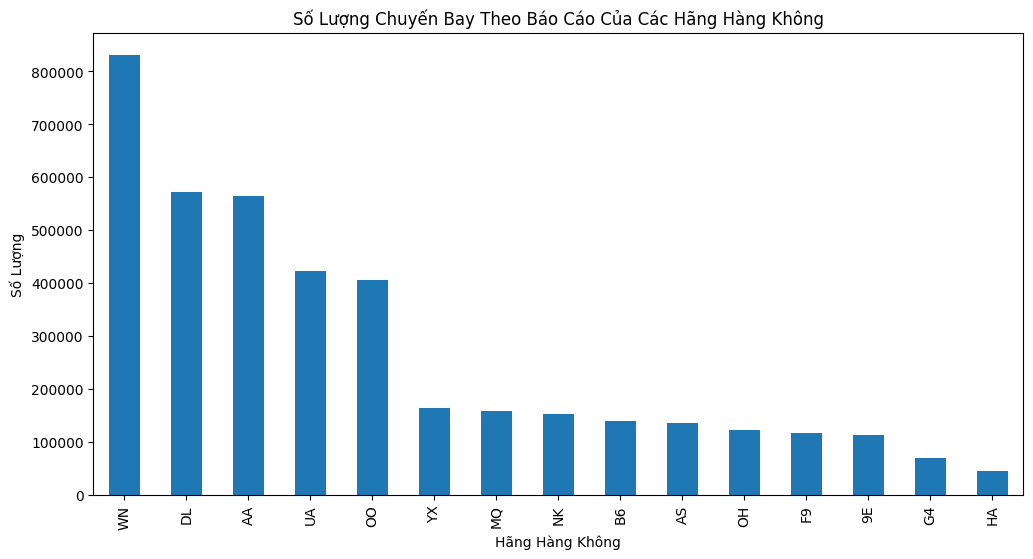

In [53]:
plt.figure(figsize=(12, 6))
df["Reporting_Airline"].value_counts().plot(kind = 'bar')
plt.title("Số Lượng Chuyến Bay Theo Báo Cáo Của Các Hãng Hàng Không")
plt.xlabel("Hãng Hàng Không")
plt.ylabel("Số Lượng")
plt.show()

Biểu đồ cột ở trên cho thấy sự phân bổ các chuyến bay giữa các hãng hàng không khác nhau. Một số quan sát chính:

- Southwest Airlines (WN) có số lượng chuyến bay cao nhất, nhiều hơn đáng kể so với bất kỳ hãng hàng không nào khác.
- Các hãng hàng không khu vực như Republic Airways (YX), Envoy Air (MQ) ..vv có ít chuyến bay hơn so với các hãng hàng không lớn khác.

Sự phân bổ này giúp chúng ta hiểu rõ hơn về thị phần và quy mô hoạt động của các hãng hàng không khác nhau trên thị trường Hoa Kỳ.

### **2. Xác định trạng thái của các chuyến bay**

Chúng ta tạo ra các danh mục sau dựa trên các dataframe ở trên mà chúng ta đã thu được để tìm tỷ lệ phần trăm trạng thái của chuyến bay:

1.   Chuyến bay sớm
2.   Chuyến bay đúng giờ
3.   Chuyến bay trễ
4.   Chuyến bay bị hủy
5.   Chuyến bay bị chuyển hướng

In [54]:
all_flights = df_early.shape[0] + df_ontime.shape[0] + df_delayed.shape[0] + df_cancelled.shape[0] + df_diverted.shape[0]
flights_early = round(df_early.shape[0]/all_flights, 2) * 100
flights_ontime = round(df_ontime.shape[0]/all_flights, 2) * 100
flights_late = round(df_delayed.shape[0]/all_flights, 2) * 100
flights_cancelled = round(df_cancelled.shape[0]/all_flights, 2) * 100
flights_diverted = round(df_diverted.shape[0]/all_flights, 2) * 100

Y = [flights_early, flights_ontime, flights_late, flights_cancelled, flights_diverted]
Y

[57.99999999999999, 17.0, 23.0, 2.0, 0.0]

#### **Biểu đồ tình trạng chuyến bay**

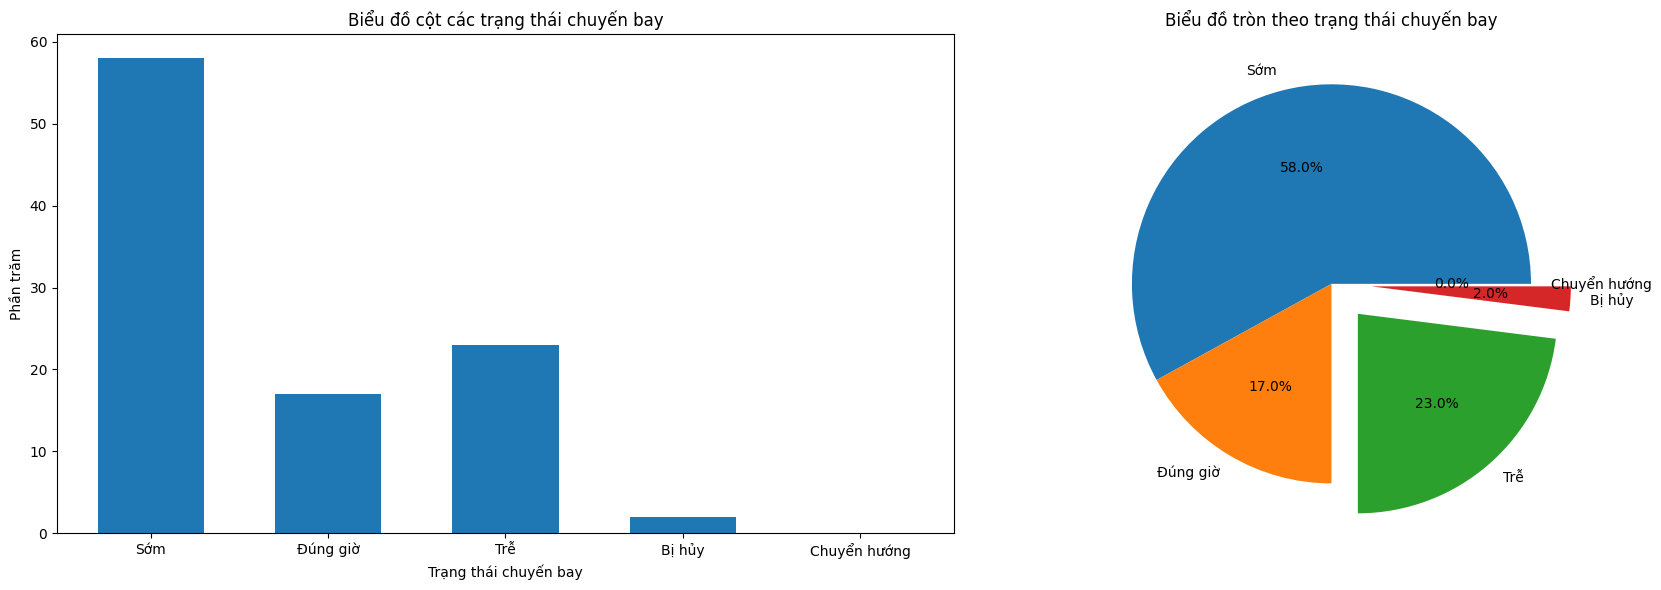

In [55]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

# Định nghĩa dữ liệu
X = ['Sớm', 'Đúng giờ', 'Trễ', 'Bị hủy', 'Chuyển hướng'] 
Y = [flights_early, flights_ontime, flights_late, flights_cancelled, flights_diverted]

# Vẽ biểu đồ cột ở biểu đồ con thứ nhất (ax1)
ax1.bar(X, Y, width = 0.6)
ax1.set_xlabel("Trạng thái chuyến bay") 
ax1.set_ylabel("Phần trăm")
ax1.set_title("Biểu đồ cột các trạng thái chuyến bay")

# Vẽ biểu đồ tròn ở biểu đồ con thứ hai (ax2)
ax2.pie(Y, labels=X, explode=[0, 0, 0.2, 0.2, 0], autopct='%1.1f%%')
ax2.set_title("Biểu đồ tròn theo trạng thái chuyến bay")

plt.tight_layout()
plt.show()

Các biểu đồ trên cung cấp một cái nhìn rõ ràng về trạng thái của các chuyến bay:

- Phần lớn các chuyến bay (khoảng 75%) là đúng giờ hoặc sớm.
- Khoảng 23% các chuyến bay bị trễ.
- Một tỷ lệ nhỏ (dưới 2%) các chuyến bay bị hủy hoặc chuyển hướng.

Phân bố này cho thấy rằng mặc dù độ trễ không phải là hiếm, nhưng phần lớn các chuyến bay hoạt động theo lịch trình hoặc tốt hơn. Tỷ lệ thấp của các chuyến bay bị hủy và chuyển hướng cho thấy rằng đây là những sự kiện tương đối hiếm gặp.

### **3. Phân tích sự chậm trễ lúc khởi hành và lúc đến. Phân tích tỷ lệ hủy chuyến bay theo thời gian (theo năm-tháng)**

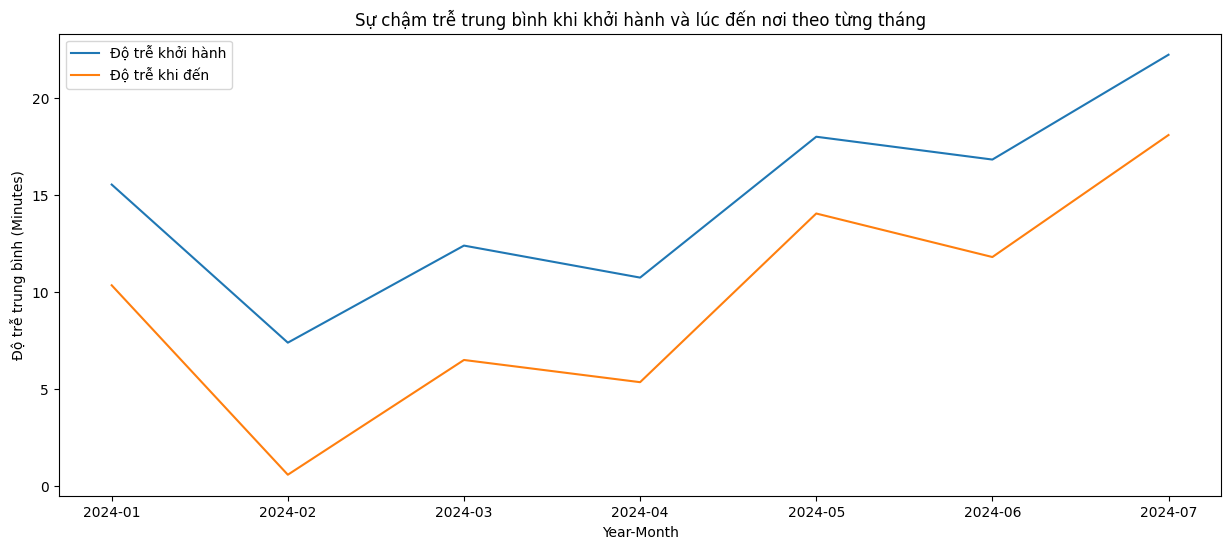

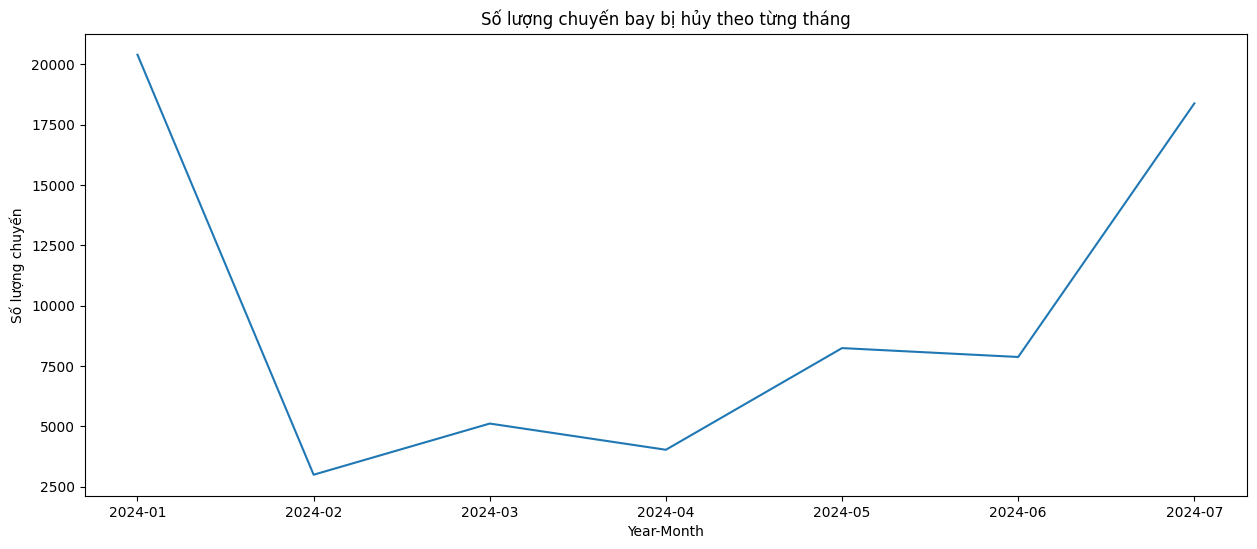

In [56]:
# Chuyển đổi FlightDate sang định dạng ngày tháng
df['FlightDate'] = pd.to_datetime(df['FlightDate'], format='%Y-%m-%d')
# Tạo một cột mới để biểu diễn năm-tháng
df['YearMonth'] = df['FlightDate'].dt.to_period('M')
# Tính toán thời gian chậm trễ trung bình khi khởi hành và đến nơi theo năm-tháng
monthly_delays = df.groupby('YearMonth')[['DepDelay', 'ArrDelay']].mean().reset_index()
monthly_delays['YearMonth'] = monthly_delays['YearMonth'].astype(str)  # Chuyển đổi YearMonth thành string
# Vẽ biểu đồ về sự chậm trễ trung bình của việc khởi hành và đến nơi theo năm-tháng
plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_delays, x='YearMonth', y='DepDelay', label='Độ trễ khởi hành')
sns.lineplot(data=monthly_delays, x='YearMonth', y='ArrDelay', label='Độ trễ khi đến')
plt.title('Sự chậm trễ trung bình khi khởi hành và lúc đến nơi theo từng tháng')
plt.xlabel('Year-Month')
plt.ylabel('Độ trễ trung bình (Minutes)')
plt.legend()
plt.show()


# Chuyển đổi FlightDate sang định dạng ngày giờ
df_cancelled['FlightDate'] = pd.to_datetime(df_cancelled['FlightDate'], format='%Y-%m-%d')
# Tạo một cột mới để biểu diễn năm-tháng
df_cancelled['YearMonth'] = df_cancelled['FlightDate'].dt.to_period('M')
# Tính tỷ lệ hủy hàng tháng
monthly_cancellations = df_cancelled.groupby('YearMonth')['Cancelled'].count().reset_index()
monthly_cancellations['YearMonth'] = monthly_cancellations['YearMonth'].astype(str)
# Trực quan biểu đồ tỷ lệ hủy hàng tháng
plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_cancellations, x='YearMonth', y='Cancelled')
plt.title('Số lượng chuyến bay bị hủy theo từng tháng')
plt.xlabel('Year-Month')
plt.ylabel('Số lượng chuyến')
plt.show()

**Độ trễ trung bình theo thời gian:**
Độ trễ khởi hành (DepDelay) và đến (ArrDelay) đều tăng dần trong các tháng đầu năm và đạt mức cao nhất vào khoảng tháng Sáu và tháng Bảy. Điều này có thể liên quan đến:
1. Tháng Một: Thời tiết khắc nghiệt (như bão tuyết, mưa lớn).
2. Tháng Năm và Bảy: Nhu cầu du lịch tăng cao trong mùa hè, gây quá tải sân bay.

**Tỷ lệ hủy chuyến theo thời gian:**
- Tỷ lệ hủy chuyến cao nhất ở tháng Một (có thể do thời tiết) và tháng Bảy (do nhu cầu du lịch cao). 
- Tỷ lệ giảm trong các tháng mùa xuân và đầu mùa hè (tháng Hai đến tháng Năm), khi điều kiện thời tiết và nhu cầu vận tải ổn định hơn.


### **4. So sánh độ trễ trung bình (cả khởi hành và đến) giữa các hãng hàng không khác nhau**

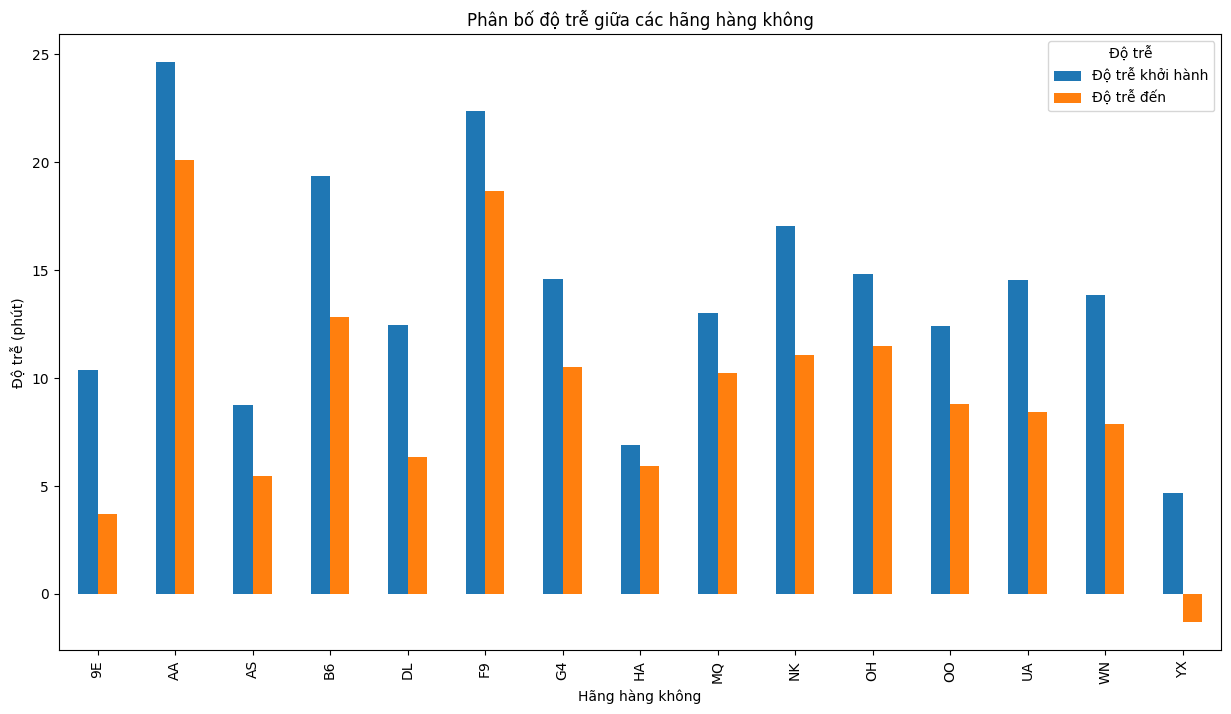

In [57]:
# Lấy 2 ký tự đầu tiên của mã hãng hàng không
df['Reporting_Airline'] = df['Reporting_Airline'].apply(lambda x: x[:2])

# Tạo biểu đồ cột thể hiện độ trễ trung bình theo từng hãng hàng không
df.groupby('Reporting_Airline')[['DepDelay','ArrDelay']].mean().plot.bar(figsize=[15, 8])

plt.title("Phân bố độ trễ giữa các hãng hàng không")
plt.ylabel('Độ trễ (phút)') 
plt.xlabel('Hãng hàng không')
plt.legend(['Độ trễ khởi hành', 'Độ trễ đến'], title="Độ trễ")
plt.show()

- Hầu hết các hãng hàng không có các mẫu độ trễ khởi hành và đến tương tự, với độ trễ khởi hành luôn cao hơn độ trễ đến.
- Hãng hàng không Southwest (WN), mặc dù có số lượng chuyến bay cao nhất, nhưng cho thấy thời gian trễ tương đối vừa phải.

### **5. Độ trễ khởi hành và đến giữa các sân bay xuất phát và đích:**

Chúng ta đang tìm hiểu xem có sân bay nào trải qua độ trễ cao hơn một cách nhất quán hay không, sử dụng dữ liệu từ các cột sau.

1. Origin
2. Dest
3. DepDelay
4. ArrDelay

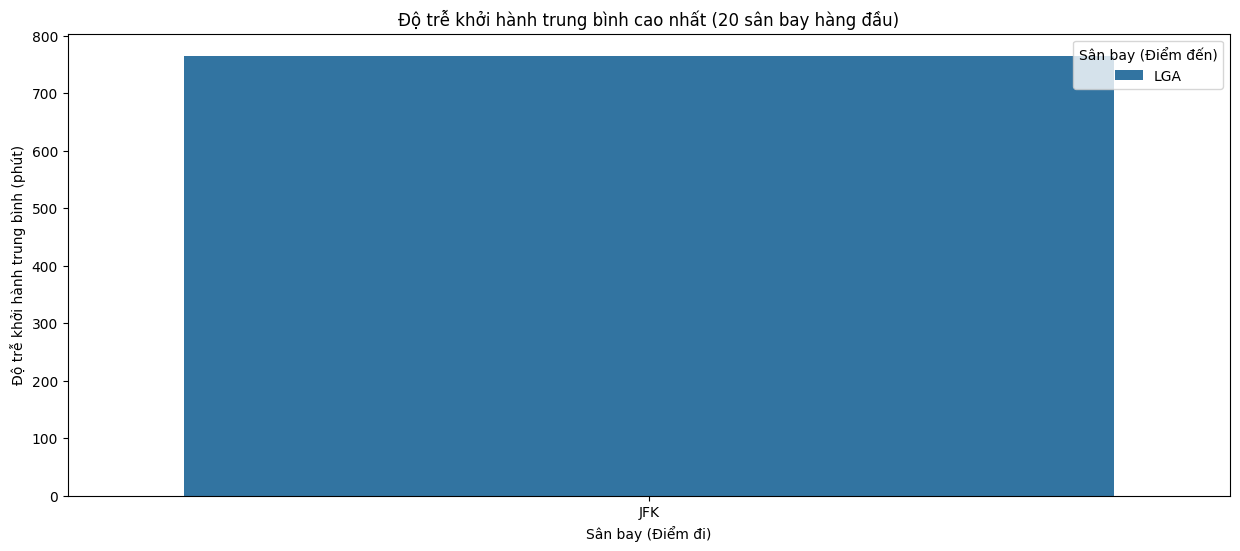

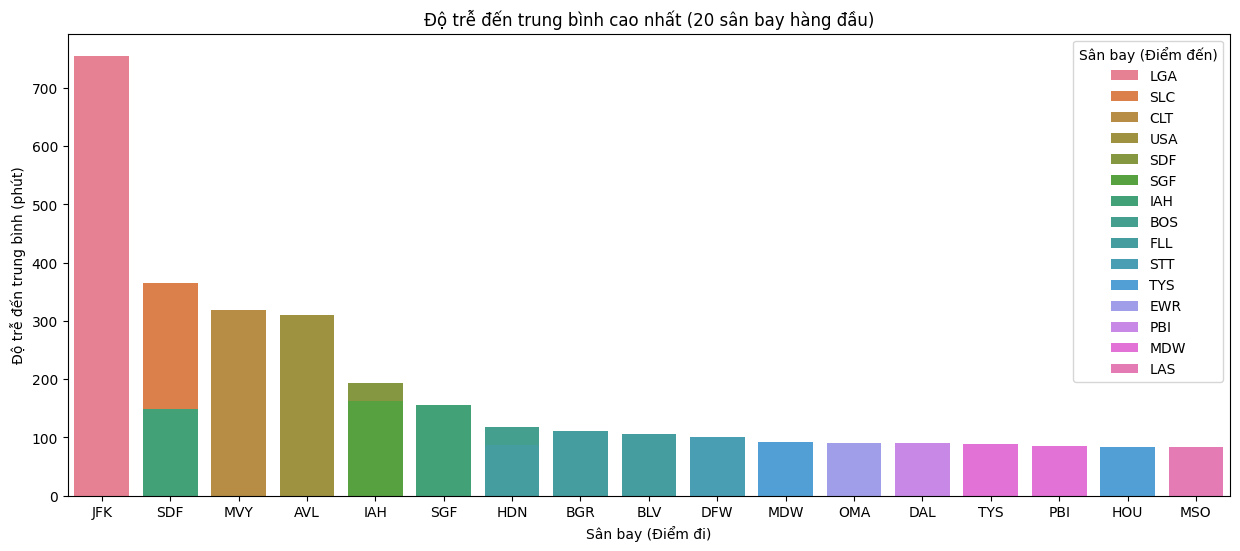

In [53]:
# Tính độ trễ trung bình theo cặp sân bay (điểm đi - điểm đến)
airport_delays = df.groupby(['Origin', 'Dest'])[['DepDelay', 'ArrDelay']].mean().reset_index()

# Lấy 20 cặp sân bay có độ trễ khởi hành cao nhất
dep_delays = airport_delays.sort_values('DepDelay', ascending = False).head(1)
plt.figure(figsize=(15, 6))
sns.barplot(data = dep_delays, x = 'Origin', y = 'DepDelay', hue = 'Dest', dodge = False)
plt.title('Độ trễ khởi hành trung bình cao nhất (20 sân bay hàng đầu)')
plt.ylabel('Độ trễ khởi hành trung bình (phút)')
plt.xlabel('Sân bay (Điểm đi)')
plt.legend(title='Sân bay (Điểm đến)')
plt.show()

# Lấy và vẽ biểu đồ cho 20 cặp sân bay có độ trễ đến cao nhất 
arr_delays = airport_delays.sort_values('ArrDelay', ascending = False).head(20)
plt.figure(figsize=(15, 6))
sns.barplot(data=arr_delays, x='Origin', y='ArrDelay', hue='Dest', dodge = False)
plt.title('Độ trễ đến trung bình cao nhất (20 sân bay hàng đầu)')
plt.ylabel('Độ trễ đến trung bình (phút)')
plt.xlabel('Sân bay (Điểm đi)')
plt.legend(title='Sân bay (Điểm đến)')
plt.show()

Sân bay Quốc tế John F. Kennedy (JFK) ở New York nổi bật trong cả biểu đồ độ trễ khởi hành và đến, luôn cho thấy độ trễ trung bình cao nhất.

### **6. Các nguyên nhân gây ra độ trễ**

Chúng ta sẽ kiểm tra các nguyên nhân gây ra độ trễ (ví dụ: Hãng hàng không, Thời tiết, Hệ thống Hàng không Quốc gia, An ninh, hoặc Máy bay đến muộn) góp phần nhiều nhất vào độ trễ chuyến bay tổng thể, sử dụng dữ liệu từ các cột sau:

1. CarrierDelay (Hãng hàng không)
2. WeatherDelay (Thời tiết)
3. NASDelay (Hệ thống Hàng không Quốc gia)
4. SecurityDelay (An ninh)
5. LateAircraftDelay (Máy bay đến muộn)

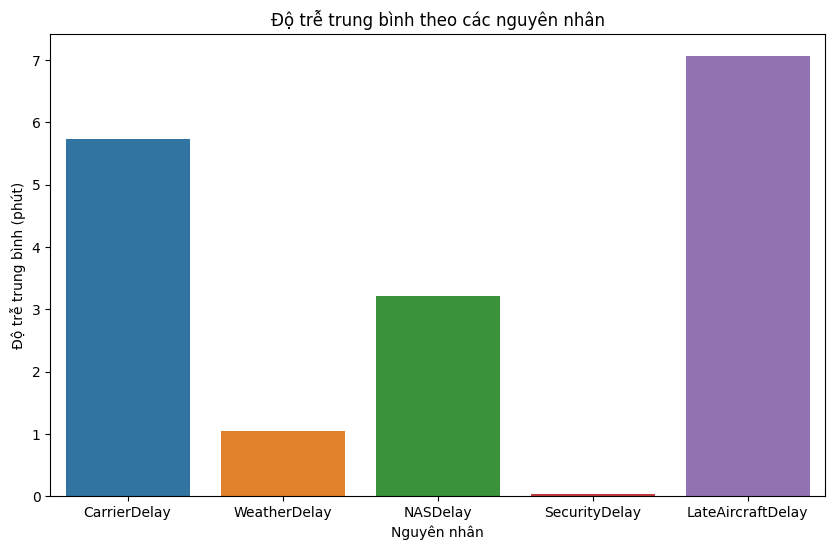

In [59]:
# Định nghĩa các loại độ trễ cần phân tích
delay_types = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

# Tính giá trị trung bình của từng loại độ trễ
delay_averages = df[delay_types].mean().reset_index()

delay_averages.columns = ['Nguyên nhân', 'Độ trễ trung bình']

# Tạo biểu đồ cột
plt.figure(figsize = (10, 6))
sns.barplot(data = delay_averages, x = 'Nguyên nhân', y = 'Độ trễ trung bình', palette = 'tab10')
plt.title('Độ trễ trung bình theo các nguyên nhân')
plt.xlabel('Nguyên nhân')
plt.ylabel('Độ trễ trung bình (phút)')
plt.show()

*Chúng ta phát hiện rằng độ trễ do máy bay đến muộn và độ trễ của hãng hàng không có độ trễ trung bình cao nhất. Điều này có nghĩa là các hãng hàng không cần phải điều chỉnh để giải quyết hoặc giảm bớt độ trễ trung bình này đang xảy ra.*

#### **Biểu đồ tròn theo phần trăm cho các nguyên nhân gây ra độ trễ**

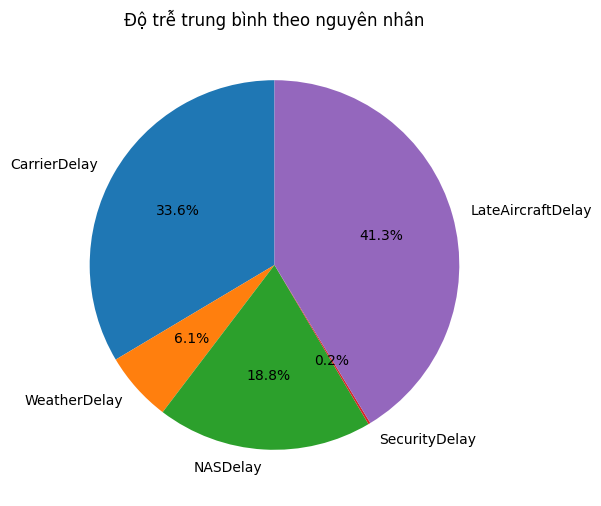

In [60]:
delay_types = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
delay_averages = df[delay_types].mean()

# Plot pie chart
plt.figure(figsize=(10, 6))
delay_averages.plot(kind='pie', autopct='%.1f%%', startangle = 90)
plt.title('Độ trễ trung bình theo nguyên nhân')
plt.show()

*Độ trễ do máy bay đến muộn chiếm 41,3% trong khi độ trễ của hãng hàng không chiếm 33,6%. Tổng cộng khoảng 75% lý do gây ra độ trễ cho máy bay (cả lúc đến và khởi hành).*

### **7. Độ trễ và hủy chuyến bay theo ngày trong tuần, tháng**

Chúng ta tìm hiểu độ trễ và hủy chuyến bay thay đổi theo ngày trong tuần, tháng hoặc thời gian trong ngày và bất kỳ giờ hoặc ngày cao điểm nào mà độ trễ có khả năng xảy ra nhiều hơn, sử dụng dữ liệu từ các trường sau:

1. DayOfWeek
2. Month
3. DepTimeBlk
4. ArrTimeBlk
5. DepDelay
6. ArrDelay
7. Cancelled

1: Thứ Hai, 2: Thứ Ba, 3: Thứ Tư, 4: Thứ Năm, 5: Thứ Sáu, 6: Thứ Bảy, 7: Chủ Nhật

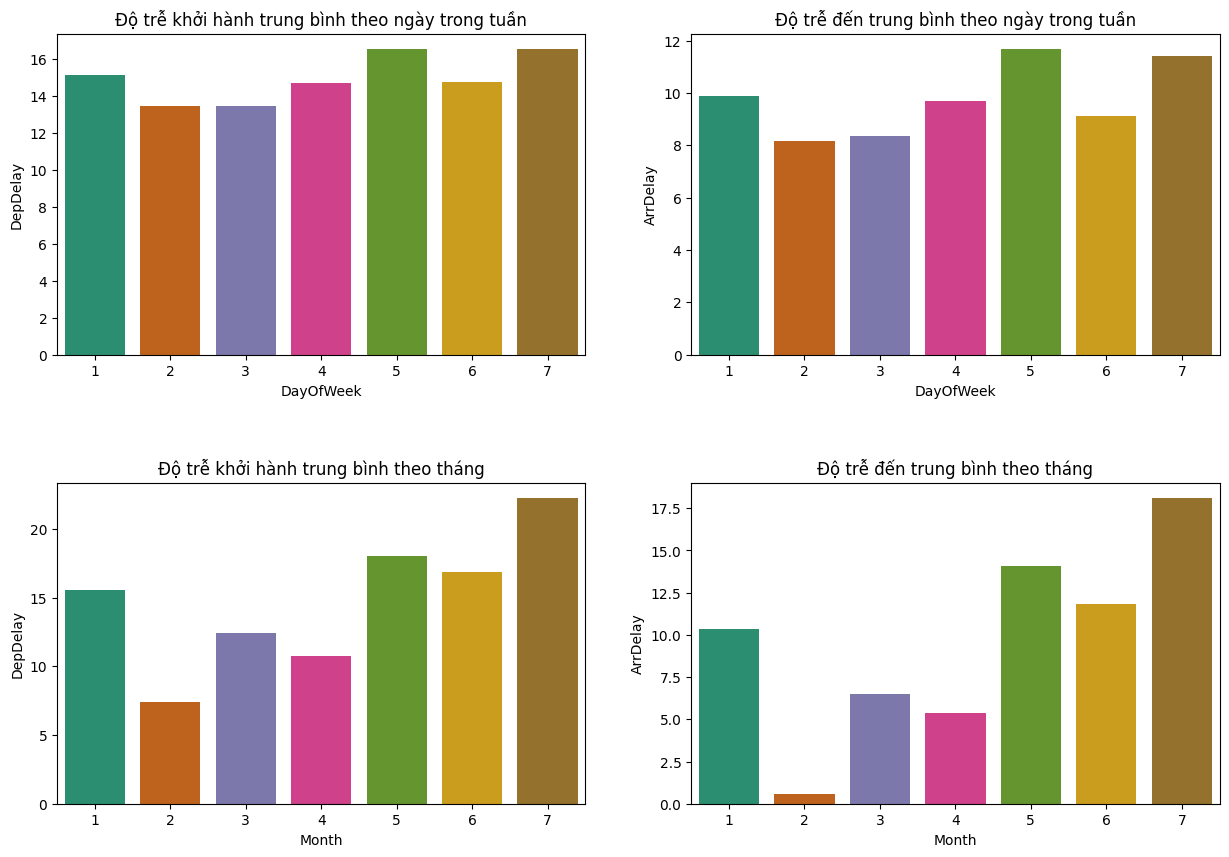

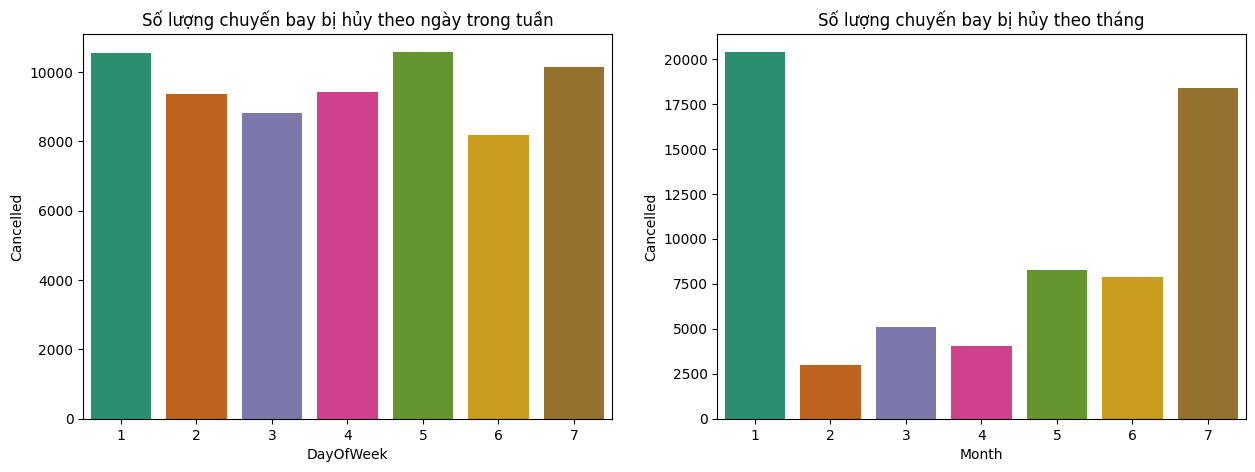

In [61]:
# Tính độ trễ trung bình theo ngày trong tuần và theo tháng
avg_delays_by_day = df.groupby('DayOfWeek')[['DepDelay', 'ArrDelay']].mean().reset_index()
avg_delays_by_month = df.groupby('Month')[['DepDelay', 'ArrDelay']].mean().reset_index()
# Đếm số chuyến bay bị hủy theo ngày trong tuần và theo tháng
cancelled_by_day_count = df_cancelled.groupby('DayOfWeek')['Cancelled'].count().reset_index()
cancelled_by_month_count = df_cancelled.groupby('Month')['Cancelled'].count().reset_index()

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Vẽ biểu đồ độ trễ khởi hành theo ngày trong tuần
sns.barplot(x='DayOfWeek', y='DepDelay', data=avg_delays_by_day, ax=axs[0, 0], palette='Dark2')
axs[0, 0].set_title('Độ trễ khởi hành trung bình theo ngày trong tuần')

# Vẽ biểu đồ độ trễ đến theo ngày trong tuần
sns.barplot(x='DayOfWeek', y='ArrDelay', data=avg_delays_by_day, ax=axs[0, 1], palette='Dark2')
axs[0, 1].set_title('Độ trễ đến trung bình theo ngày trong tuần')

# Vẽ biểu đồ độ trễ khởi hành theo tháng
sns.barplot(x='Month', y='DepDelay', data=avg_delays_by_month, ax=axs[1, 0], palette='Dark2')
axs[1, 0].set_title('Độ trễ khởi hành trung bình theo tháng')

# Vẽ biểu đồ độ trễ đến theo tháng
sns.barplot(x='Month', y='ArrDelay', data=avg_delays_by_month, ax=axs[1, 1], palette='Dark2')
axs[1, 1].set_title('Độ trễ đến trung bình theo tháng')

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

# Tạo 2 biểu đồ cho số lượng chuyến bay bị hủy
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# Vẽ biểu đồ số chuyến bay bị hủy theo ngày trong tuần
sns.barplot(x='DayOfWeek', y='Cancelled', data=cancelled_by_day_count, ax=axs[0], palette='Dark2')
axs[0].set_title('Số lượng chuyến bay bị hủy theo ngày trong tuần')
# Vẽ biểu đồ số chuyến bay bị hủy theo tháng
sns.barplot(x='Month', y='Cancelled', data=cancelled_by_month_count, ax=axs[1], palette='Dark2')
axs[1].set_title('Số lượng chuyến bay bị hủy theo tháng')

plt.show()

Độ trễ theo tuần: Thứ Sáu và Chủ Nhật có độ trễ trung bình cao nhất, trong khi Thứ Ba và Thứ Tư có độ trễ thấp nhất.

Độ trễ theo tháng: Tháng Bảy ghi nhận nhiều độ trễ nhất, trong khi Tháng Hai có ít độ trễ nhất, phản ánh các đỉnh điểm du lịch theo mùa.

Hủy chuyến theo tuần: Thứ Hai và Thứ Sáu cho thấy số lượng hủy chuyến cao nhất, trong khi các ngày giữa tuần như Thứ Ba có ít hủy chuyến hơn.

Hủy chuyến theo tháng: Tháng Một dẫn đầu về số lượng hủy chuyến, tiếp theo là Tháng Bảy, có thể do thời tiết và đỉnh điểm du lịch.

Kết luận: Tháng Bảy và Tháng Một là những tháng bận rộn nhất về độ trễ và hủy chuyến, đặc biệt vào các ngày Thứ Sáu và Chủ Nhật. Du lịch vào giữa tuần và trong các tháng thấp điểm như Tháng Hai có thể giúp tránh gián đoạn.

### **8. Mối quan hệ giữa khoảng cách bay và thời gian trễ**

Chúng ta đang tìm hiểu mối quan hệ giữa khoảng cách bay và thời gian trễ để phân tích trong số các chuyến bay dài và ngắn, chuyến bay nào có khả năng bị trễ nhiều hơn, sử dụng dữ liệu từ các cột sau:

1. Distance
2. DepDelay
3. ArrDelay

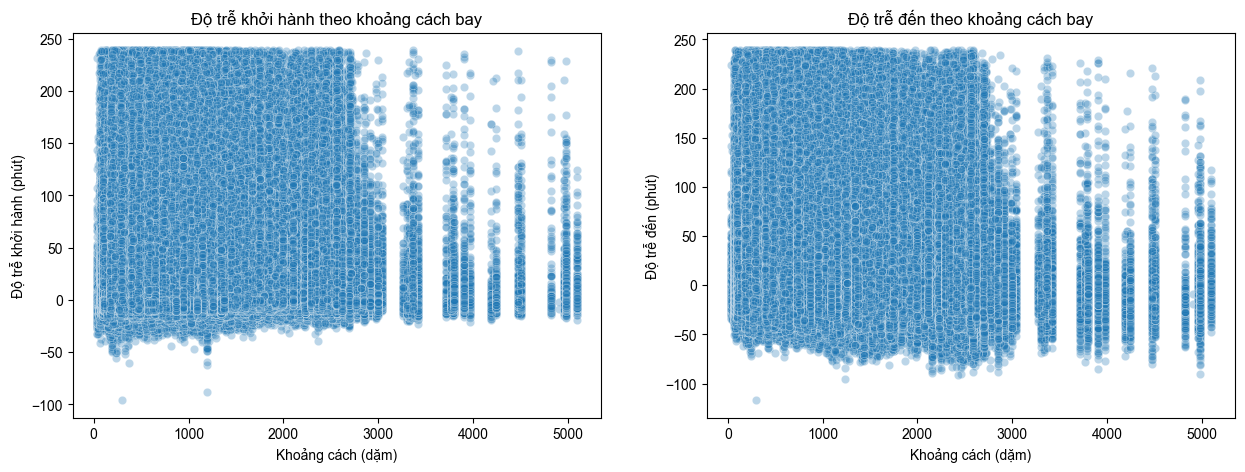

In [62]:
# Lọc bỏ các độ trễ cực độ để làm cho biểu đồ dễ đọc hơn
filtered_df = df[(df['DepDelay'] < 240) & (df['ArrDelay'] < 240)]

# Thiết lập các biểu đồ con
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.set_style("whitegrid")

# Biểu đồ phân tán thể hiện độ trễ khởi hành theo khoảng cách bay
sns.scatterplot(x='Distance', y='DepDelay', data=filtered_df, ax=axs[0], alpha=0.3)
axs[0].set_title('Độ trễ khởi hành theo khoảng cách bay')
axs[0].set_xlabel('Khoảng cách (dặm)')
axs[0].set_ylabel('Độ trễ khởi hành (phút)')

# Biểu đồ phân tán thể hiện độ trễ đến theo khoảng cách bay
sns.scatterplot(x='Distance', y='ArrDelay', data=filtered_df, ax=axs[1], alpha=0.3)
axs[1].set_title('Độ trễ đến theo khoảng cách bay')
axs[1].set_xlabel('Khoảng cách (dặm)')
axs[1].set_ylabel('Độ trễ đến (phút)')

plt.show()

*Từ biểu đồ phân tán ở trên, chúng ta thấy rằng các chuyến bay cự ly ngắn bị chậm trễ nhiều hơn so với các chuyến bay cự ly dài*

### **9. Tác động của các chuyến bay bị chuyển hướng đến độ trễ và hủy chuyến tổng thể**

Tìm hiểu tác động của các chuyến bay bị chuyển hướng đến độ trễ và hủy chuyến tổng thể, và liệu một số hãng hàng không hoặc sân bay có dễ bị chuyển hướng hơn những hãng khác hay không, sử dụng dữ liệu từ các cột sau:

1. Reporting_Airline
2. Origin
3. Dest
4. Diverted

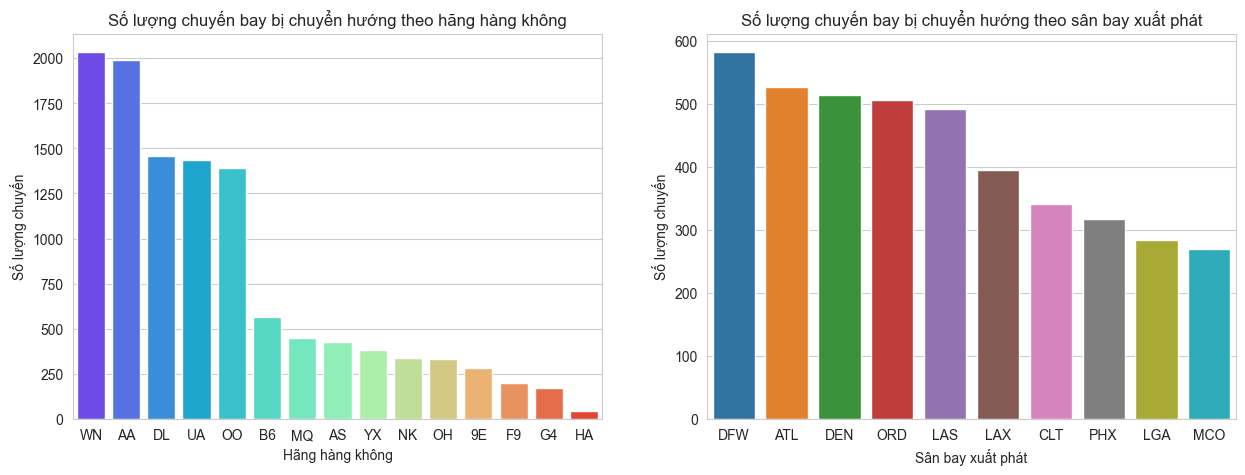

In [63]:
# Đếm số chuyến bay bị chuyển hướng theo hãng hàng không
airline_diverted = df_diverted[df_diverted['Diverted'] == 1]['Reporting_Airline'].value_counts()
# Đếm số chuyến bay bị chuyển hướng theo sân bay xuất phát (lấy top 10)
origin_diverted = df_diverted[df_diverted['Diverted'] == 1]['Origin'].value_counts().head(10)

# Thiết lập các biểu đồ con
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.set_style("whitegrid")

# Vẽ biểu đồ cột số chuyến bay bị chuyển hướng theo hãng hàng không
sns.barplot(x=airline_diverted.index, y=airline_diverted.values, ax=axs[0], palette='rainbow')
axs[0].set_title('Số lượng chuyến bay bị chuyển hướng theo hãng hàng không')
axs[0].set_xlabel('Hãng hàng không')
axs[0].set_ylabel('Số lượng chuyến')

# Vẽ biểu đồ cột số chuyến bay bị chuyển hướng theo sân bay xuất phát
sns.barplot(x=origin_diverted.index, y=origin_diverted.values, ax=axs[1], palette='tab10')
axs[1].set_title('Số lượng chuyến bay bị chuyển hướng theo sân bay xuất phát')
axs[1].set_xlabel('Sân bay xuất phát')
axs[1].set_ylabel('Số lượng chuyến')

plt.show()

Chuyến bay bị chuyển hướng theo hãng hàng không: **WN** (Southwest Airlines) có số lượng chuyến bay bị chuyển hướng cao nhất, tiếp theo là **AA** (American Airlines) và **DL** (Delta Airlines). Các hãng hàng không nhỏ hơn như **HA** và **G4** cho thấy ít chuyến bay bị chuyển hướng nhất.

Chuyến bay bị chuyển hướng theo sân bay xuất phát: **DFW** (Dallas/Fort Worth) dẫn đầu về số chuyến bay bị chuyển hướng, theo sau là **ATL** (Atlanta) và **DEN** (Denver). Các sân bay như **MCO** (Orlando) và **LGA** (LaGuardia) có ít chuyến bay bị chuyển hướng hơn.

### **10. Tỷ lệ chuyến bay đúng giờ giữa các hãng hàng không, sân bay và khoảng thời gian khác nhau**

Chúng ta đang tìm tỷ lệ chuyến bay đúng giờ so sánh giữa các hãng hàng không, sân bay và khoảng thời gian khác nhau bằng cách sử dụng dữ liệu từ các cột sau.

1. Reporting_Airline
2. Origin
3. Dest
4. Year
5. Month
6. DayOfWeek
7. DepDelay
8. ArrDelay

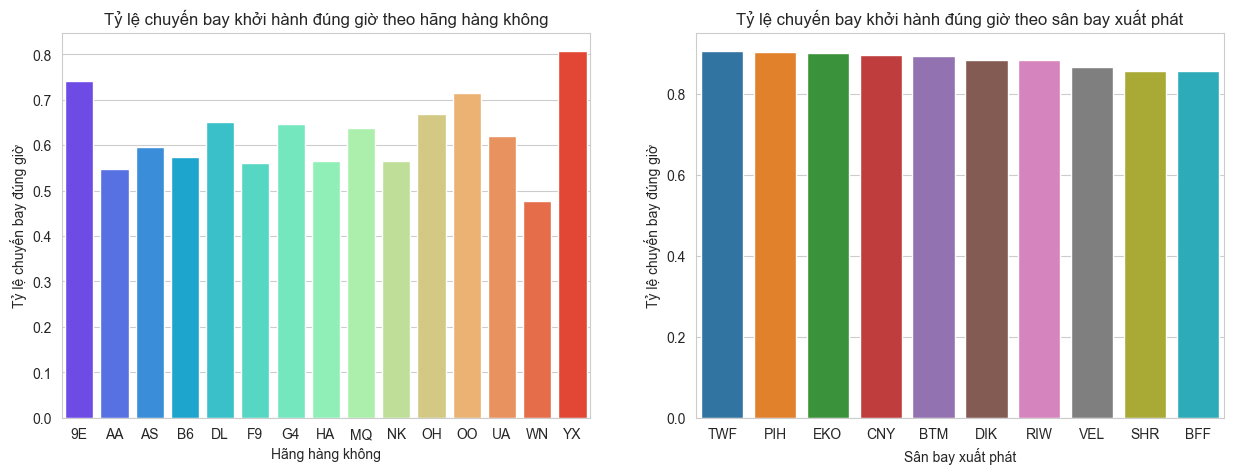

In [64]:
def is_on_time(delay):
    return 1 if delay <= 0 else 0

# Tính toán các chuyến bay đúng giờ
df['OnTime_Dep'] = df['DepDelay'].apply(is_on_time)
df['OnTime_Arr'] = df['ArrDelay'].apply(is_on_time)

# Tính tỷ lệ chuyến bay đúng giờ theo hãng hàng không và sân bay khởi hành
airline_ontime = df.groupby('Reporting_Airline')['OnTime_Dep'].mean()
origin_ontime = df.groupby('Origin')['OnTime_Dep'].mean().sort_values(ascending=False).head(10)

# Thiết lập các biểu đồ con
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.set_style("whitegrid")

# Vẽ biểu đồ tỷ lệ chuyến bay đúng giờ theo hãng hàng không
sns.barplot(x=airline_ontime.index, y=airline_ontime.values, ax=axs[0], palette='rainbow')
axs[0].set_title('Tỷ lệ chuyến bay khởi hành đúng giờ theo hãng hàng không')
axs[0].set_xlabel('Hãng hàng không')
axs[0].set_ylabel('Tỷ lệ chuyến bay đúng giờ')

# Vẽ biểu đồ tỷ lệ chuyến bay đúng giờ theo sân bay khởi hành
sns.barplot(x=origin_ontime.index, y=origin_ontime.values, ax=axs[1], palette='tab10')
axs[1].set_title('Tỷ lệ chuyến bay khởi hành đúng giờ theo sân bay xuất phát')
axs[1].set_xlabel('Sân bay xuất phát')
axs[1].set_ylabel('Tỷ lệ chuyến bay đúng giờ')

plt.show()

Tỷ lệ chuyến bay khởi hành đúng giờ theo hãng hàng không: YX dẫn đầu với tỷ lệ chuyến bay khởi hành đúng giờ cao nhất, tiếp theo là 9E và OO. WN (Southwest) có tỷ lệ thấp nhất, cho thấy có nhiều độ trễ hơn.

Tỷ lệ chuyến bay khởi hành đúng giờ theo sân bay xuất phát gần như giống nhau cho tất cả các sân bay.

### **11. Các yếu tố có ảnh hưởng lớn nhất đến độ trễ chuyến bay**

Chúng ta đang tìm hiểu các yếu tố (ví dụ: hãng hàng không, sân bay xuất phát và đích, các yếu tố liên quan đến thời gian, hoặc đặc điểm chuyến bay) có ảnh hưởng lớn nhất đến độ trễ chuyến bay và liệu những yếu tố này có thể được sử dụng để dự đoán độ trễ hoặc hủy chuyến bay hay không, sử dụng dữ liệu từ các cột sau:

1. Reporting_Airline
2. Origin
3. Dest
4. DayOfWeek
5. Month
6. DepTimeBlk
7. ArrTimeBlk
8. Distance
9. DepDelay
10. ArrDelay
11. CarrierDelay
12. WeatherDelay
13. NASDelay
14. SecurityDelay
15. LateAircraftDelay

In [68]:
# Chuyển đổi 'DepTime' và 'ArrTime' sang định dạng số
def time_to_minutes(time_val):
    if pd.isna(time_val):
        return np.nan
    if isinstance(time_val, str):
        try:
            time_obj = datetime.strptime(time_val, '%I:%M %p')
            return time_obj.hour * 60 + time_obj.minute
        except ValueError:
            return np.nan
    elif isinstance(time_val, (int, float)):
        # Giả sử thời gian ở định dạng HHMM
        hours = int(time_val) // 100
        minutes = int(time_val) % 100
        return hours * 60 + minutes
    else:
        return np.nan

df['DepTime_minutes'] = df['DepTime'].apply(time_to_minutes)
df['ArrTime_minutes'] = df['ArrTime'].apply(time_to_minutes)

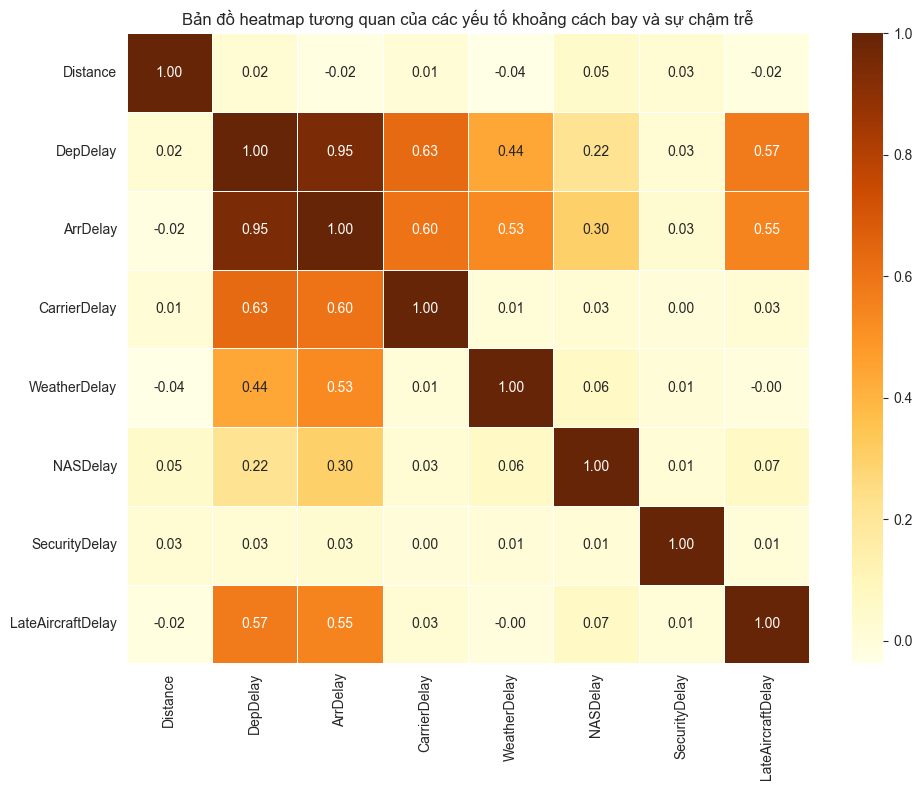

In [69]:
# Tính toán giá trị độ trễ trung bình theo hãng hàng không, điểm xuất phát, điểm đến và khoảng cách
avg_delays = df.groupby(['Reporting_Airline', 'Origin', 'Dest', 'Distance']).agg({
    'DepDelay': 'mean',
    'ArrDelay': 'mean',
    'CarrierDelay': 'mean',
    'WeatherDelay': 'mean',
    'NASDelay': 'mean',
    'SecurityDelay': 'mean',
    'LateAircraftDelay': 'mean'
}).reset_index()

# Tính toán ma trận tương quan chỉ dành cho các yếu tố khoảng cách và độ trễ
corr_matrix = avg_delays[['Distance', 'DepDelay', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].corr()

# Tạo bản đồ heatmap để trực quan hóa ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="YlOrBr", linewidths=0.6, fmt='.2f')
plt.title("Bản đồ heatmap tương quan của các yếu tố khoảng cách bay và sự chậm trễ")
plt.tight_layout()
plt.show()

- Biểu đồ heatmap cho thấy độ trễ khởi hành (DepDelay) và độ trễ đến (ArrDelay) có mối tương quan chặt chẽ (0,95), cho thấy độ trễ khởi hành có khả năng dự đoán độ trễ đến cao.
- LateAircraftDelay cũng có mối liên hệ đáng kể với các loại độ trễ khác, đặc biệt là DepDelay và ArrDelay.
- Khoảng cách bay (Distance) không đóng vai trò quan trọng trong việc quyết định độ trễ, và SecurityDelay có ảnh hưởng rất nhỏ trong mối quan hệ với các yếu tố khác.


#### **12. Biểu đồ phân tán mối quan hệ giữa các loại độ trễ chuyến bay nhằm xác định các yếu tố ảnh hưởng chính đến thời gian khởi hành và đến nơi của các chuyến bay**

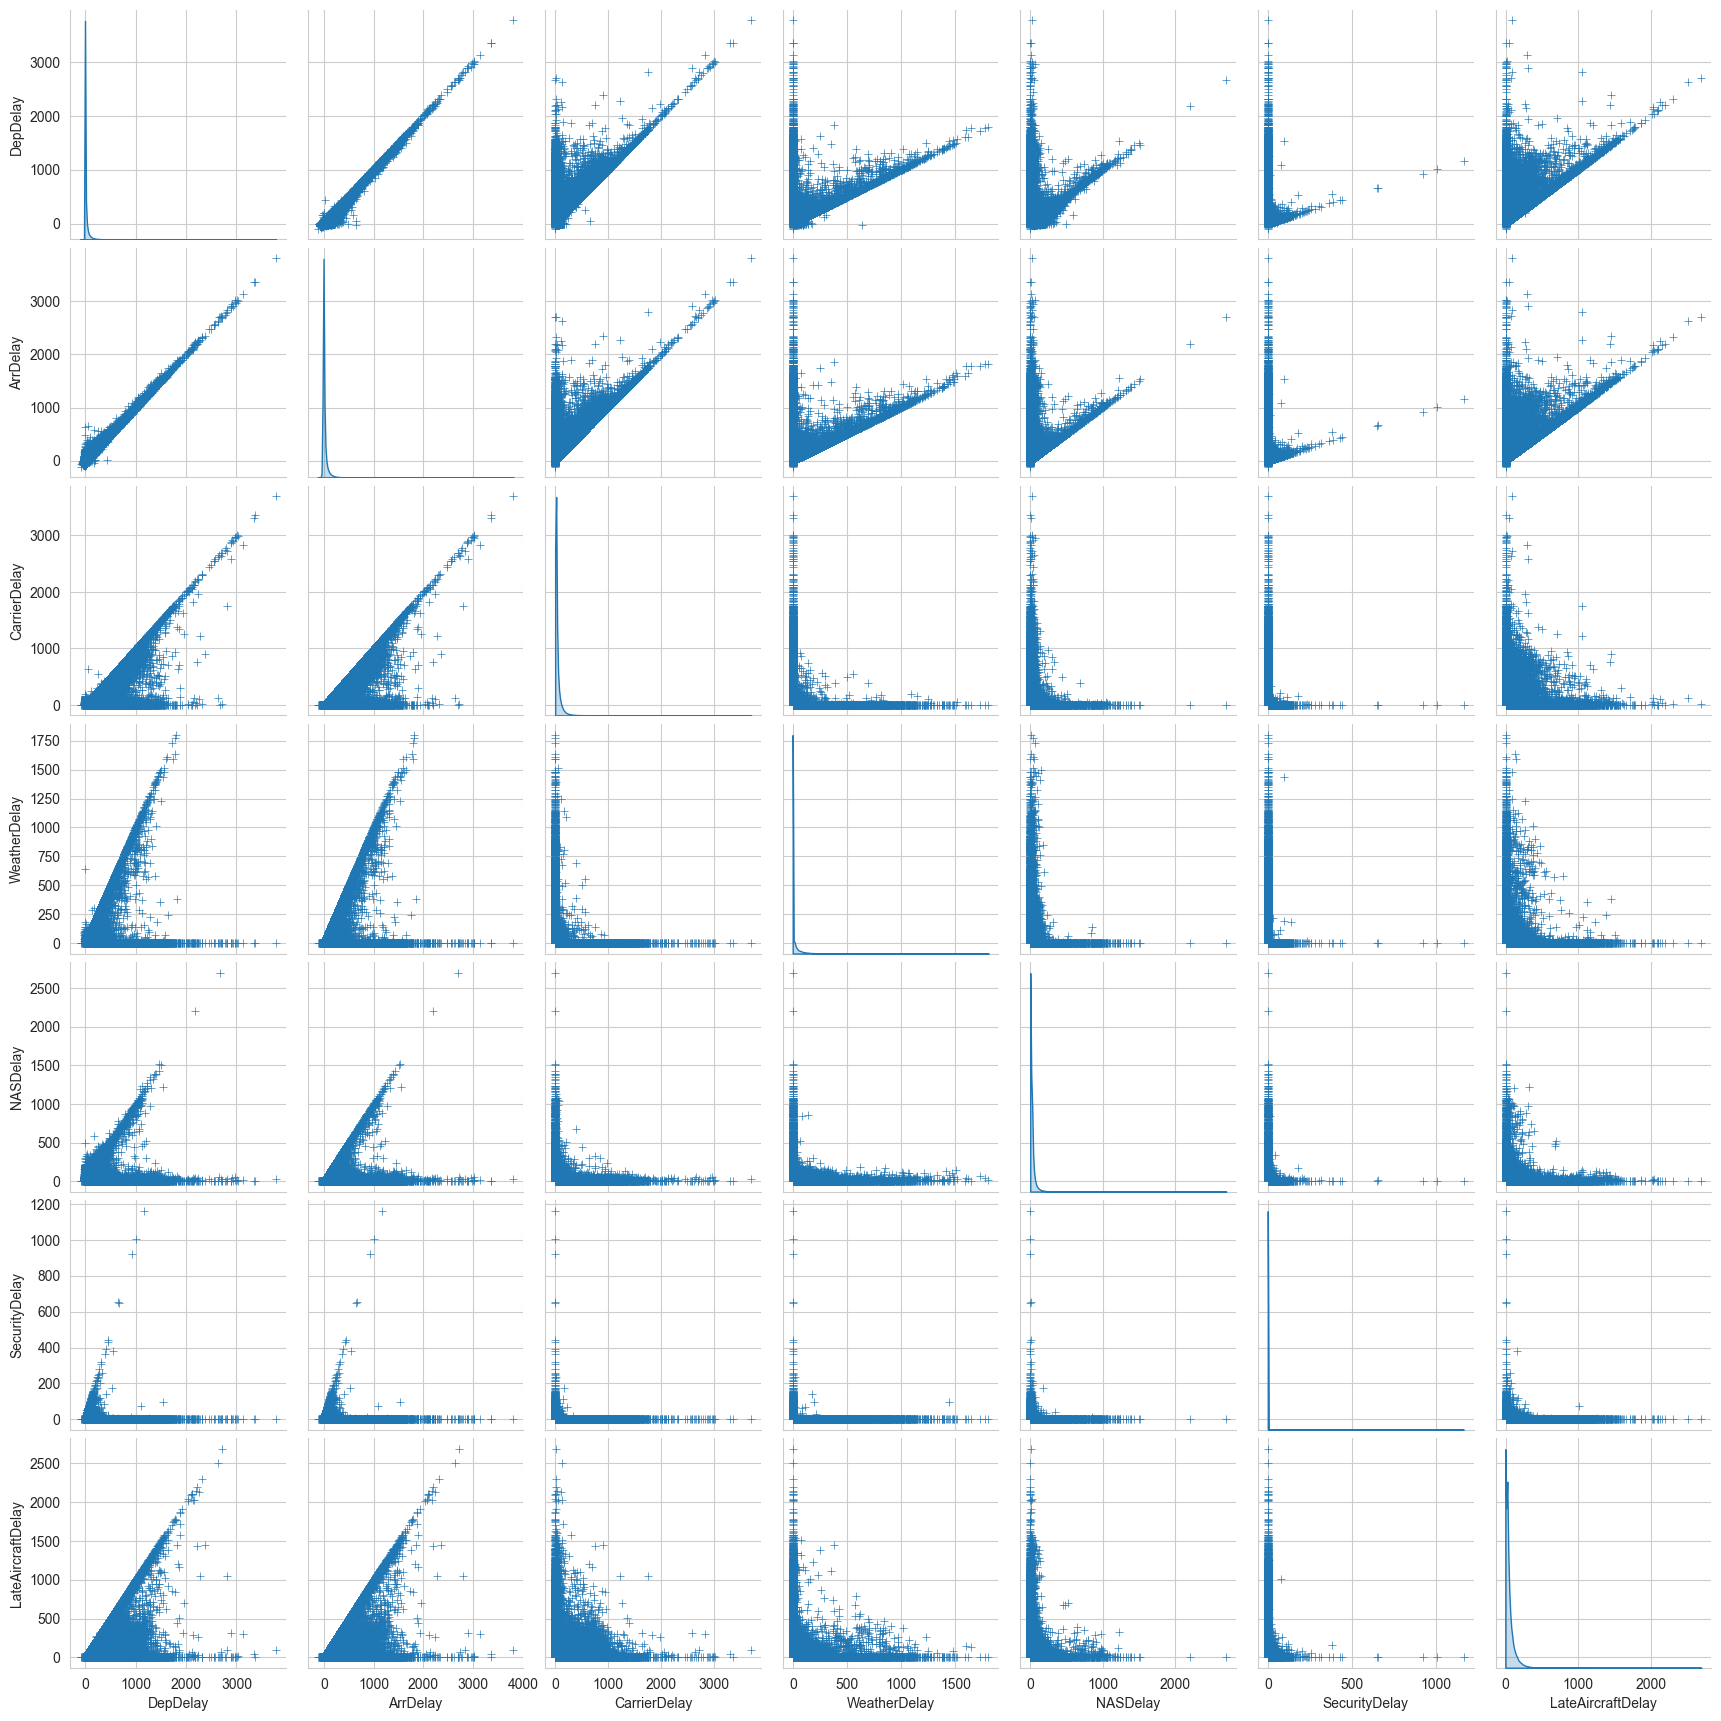

In [67]:
avg_delays = df.groupby(['Reporting_Airline', 'Origin', 'Dest', 'DayOfWeek', 'Month', 'DepTime', 'ArrTime', 'Distance']).agg({
    'DepDelay': 'mean',
    'ArrDelay': 'mean',
    'CarrierDelay': 'mean',
    'WeatherDelay': 'mean',
    'NASDelay': 'mean',
    'SecurityDelay': 'mean',
    'LateAircraftDelay': 'mean'
}).reset_index()

# Tạo một biểu đồ cặp để trực quan hóa mối quan hệ giữa các tính năng và độ trễ khác nhau
selected_columns = ['DepDelay', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
sns.pairplot(avg_delays[selected_columns], diag_kind='kde', markers='+')
plt.show()

Sự tương quan mạnh giữa các loại trì hoãn chính:
- DepDelay (trì hoãn khởi hành) và ArrDelay (trì hoãn đến):
Có tương quan dương rất cao. Nghĩa là, nếu một chuyến bay bị trì hoãn khi khởi hành (DepDelay lớn), khả năng cao nó cũng sẽ bị trì hoãn khi đến nơi (ArrDelay lớn).


Ảnh hưởng của các loại trì hoãn khác:
1. CarrierDelay (trì hoãn do hãng hàng không):
- Các điểm phân tán cho thấy CarrierDelay có thể ảnh hưởng lớn đến ArrDelay. Nếu CarrierDelay tăng, khả năng cao ArrDelay, DepDelay cũng tăng.
2. WeatherDelay (trì hoãn do thời tiết):
- Tương quan thấp hơn với ArrDelay, DepDelay nhưng vẫn có ảnh hưởng trong một số trường hợp (đặc biệt với giá trị WeatherDelay lớn).
3. LateAircraftDelay (trì hoãn do máy bay đến trễ):
- Có tương quan khá mạnh với ArrDelay. Nghĩa là, nếu máy bay trước đó đến trễ, nó sẽ gây ảnh hưởng lớn đến chuyến bay hiện tại.


### **13. Những lý do phổ biến nhất cho việc hủy chuyến bay**

Chúng ta sẽ tìm hiểu những lý do phổ biến nhất cho việc hủy chuyến bay và liệu những lý do này có thay đổi dựa trên hãng hàng không, sân bay hoặc khoảng thời gian hay không, sử dụng dữ liệu từ các cột sau:

1. Cancelled
2. CancellationCode
3. Reporting_Airline
4. Origin
5. Dest
6. Year
7. Month
8. DayOfWeek

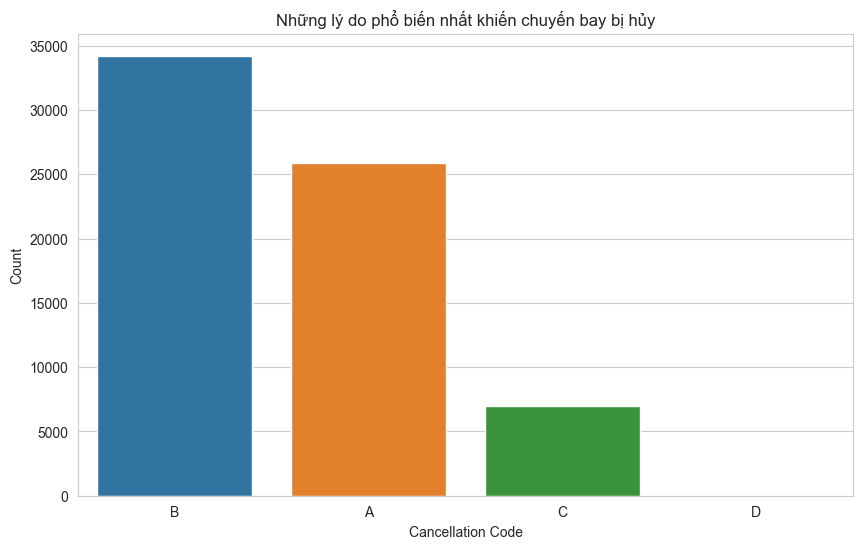

In [70]:
cancelled_flights = df_cancelled[df_cancelled['Cancelled'] == 1]
# Đếm số lần xuất hiện của mỗi mã hủy
cancellation_counts = cancelled_flights['CancellationCode'].value_counts()
# Biểu đồ thanh vì lý do hủy bỏ
plt.figure(figsize=(10, 6))
sns.barplot(x=cancellation_counts.index, y=cancellation_counts.values, palette='tab10')
plt.title('Những lý do phổ biến nhất khiến chuyến bay bị hủy')
plt.xlabel('Cancellation Code')
plt.ylabel('Count')
plt.show()

Biểu đồ cột cho thấy rằng các vấn đề liên quan đến hãng hàng không (mã B) là nguyên nhân phổ biến nhất gây ra việc hủy chuyến bay, tiếp theo là các hủy chuyến liên quan đến thời tiết (mã A). Các vấn đề của Hệ thống Hàng không Quốc gia (NAS) (mã C) là lý do phổ biến thứ ba, trong khi các hủy chuyến liên quan đến an ninh (mã D) thì tương đối hiếm. Điều này cho thấy rằng các hoạt động nội bộ của hãng hàng không và điều kiện thời tiết là những yếu tố chính ảnh hưởng đến việc hủy chuyến bay.

### **14. Mối quan hệ giữa thời gian taxi vào, taxi ra và độ trễ chuyến bay tổng thể**

Chúng ta sẽ tìm hiểu mối quan hệ giữa thời gian taxi vào, taxi ra và độ trễ chuyến bay tổng thể, cũng như liệu thời gian taxi lâu hơn có liên quan đến việc tăng độ trễ hay không, sử dụng dữ liệu từ các cột sau:

1. TaxiIn
2. TaxiOut
3. DepDelay
4. ArrDelay

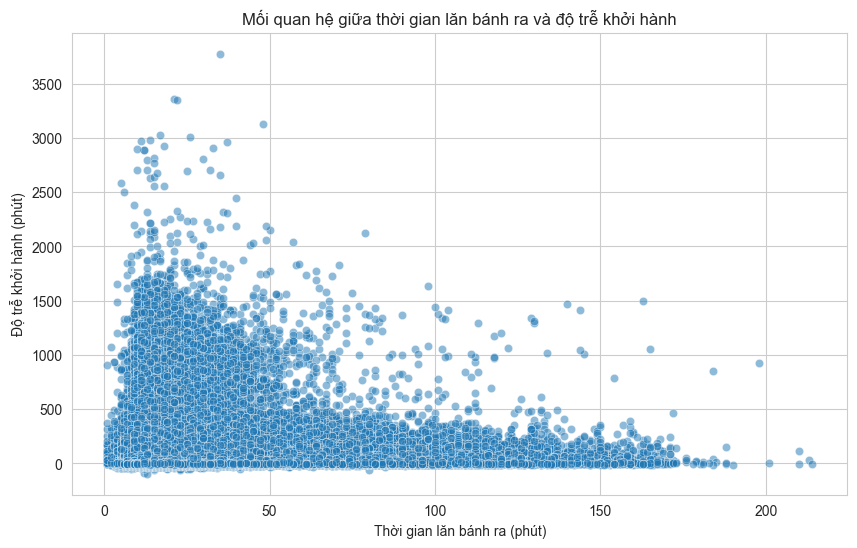

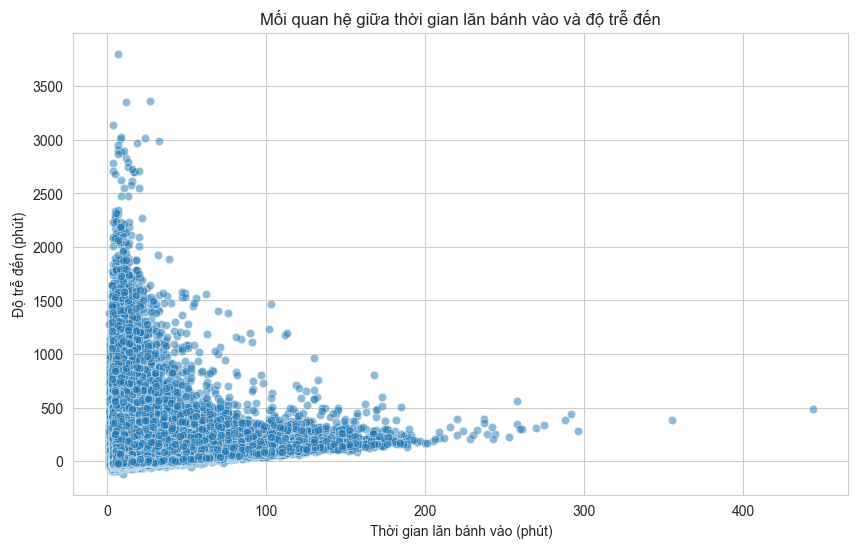

In [68]:
# Vẽ biểu đồ phân tán cho mối quan hệ giữa thời gian lăn bánh ra và độ trễ khởi hành
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TaxiOut', y='DepDelay', data=df, alpha=0.5)
plt.title('Mối quan hệ giữa thời gian lăn bánh ra và độ trễ khởi hành')
plt.xlabel('Thời gian lăn bánh ra (phút)')
plt.ylabel('Độ trễ khởi hành (phút)')
plt.show()

# Vẽ biểu đồ phân tán cho mối quan hệ giữa thời gian lăn bánh vào và độ trễ đến
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TaxiIn', y='ArrDelay', data=df, alpha=0.5)
plt.title('Mối quan hệ giữa thời gian lăn bánh vào và độ trễ đến')
plt.xlabel('Thời gian lăn bánh vào (phút)')
plt.ylabel('Độ trễ đến (phút)')
plt.show()

"Từ các biểu đồ trên, chúng ta có thể thấy rằng các hãng hàng không cố gắng giảm thời gian taxi-in (thời gian máy bay di chuyển từ đường băng vào cổng) và taxi-out (thời gian máy bay di chuyển từ cổng ra đường băng) nếu các chuyến bay bị chậm trễ đáng kể, nhằm bù lại tổng thời gian bay."

### **Lựa chọn đặc trưng để dự đoán**

In [54]:
colPred = ['Month', 'DayofMonth', 'DayOfWeek', 'Distance', 'DistanceGroup', 'DepTime', 'CRSDepTime', 'DepDelay', 'DepartureDelayGroups', 'DepDelayMinutes', 'CRSArrTime', 'CRSElapsedTime', 'ArrDelay', 'LateAircraftDelay','Reporting_Airline', 'Origin', 'Dest']

In [55]:
arrDelay_df = df[colPred]
get_df_info(arrDelay_df)

Dataframe Shape: (4017403, 17)
No missing values found in the dataframe.


Hàm được viết để xóa số 0 ở đầu, hàm này sẽ được sử dụng để chuyển đổi trường Thời gian (Object) thành số Float cho mục đích dự đoán.

In [56]:
def remove_zero(col):
    col_str = str(col)
    if col_str[0] == '0':
        return col_str[1:]
    else:
        return col_str

In [57]:
def convert_to_hours_minutes(df, time_column):
    # Chuyển đổi cột thời gian thành datetime và trích xuất các thành phần giờ và phút
    df['hours'] = pd.to_datetime(df[time_column].apply(lambda x: remove_zero(x))).dt.hour
    df['minutes'] = pd.to_datetime(df[time_column].apply(lambda x: remove_zero(x))).dt.minute / 60
    
    # Tạo một cột mới tính thời gian theo giờ và phút
    df[time_column] = df['hours'] + df['minutes']
    
    # Xóa các cột phụ không cần thiết
    df = df.drop(columns=['hours', 'minutes'])
    
    return df

Chuyển đổi CRSDepTime từ Time (Object) sang Float

In [58]:
arrDelay_df = convert_to_hours_minutes(arrDelay_df, 'CRSDepTime')
get_df_info(arrDelay_df)


Dataframe Shape: (4017403, 17)
Dataframe Missing Shape: (3, 1)


,CRSDepTime
column type,float64
null values:,1
null values (%),0.000025


Chuyển đổi DepTime từ Time (Object) sang Float

In [59]:
arrDelay_df = convert_to_hours_minutes(arrDelay_df, 'DepTime')
get_df_info(arrDelay_df)

Dataframe Shape: (4017403, 17)
Dataframe Missing Shape: (3, 2)


,DepTime,CRSDepTime
column type,float64,float64
null values:,464,1
null values (%),0.01155,0.000025


Chuyển đổi CRSArrTime từ Thời gian (Object) sang Float

In [60]:
arrDelay_df = convert_to_hours_minutes(arrDelay_df, 'CRSArrTime')
get_df_info(arrDelay_df)

Dataframe Shape: (4017403, 17)
Dataframe Missing Shape: (3, 2)


,DepTime,CRSDepTime
column type,float64,float64
null values:,464,1
null values (%),0.01155,0.000025


Chuyển đổi Month, DayofMonth và DayofWeek từ kiểu dữ liệu Object sang int cho mục đích dự đoán

In [61]:
arrDelay_df['DayofMonth'] = arrDelay_df['DayofMonth'].astype(float).astype(int)
arrDelay_df['DayOfWeek'] = arrDelay_df['DayOfWeek'].astype(float).astype(int)
get_df_info(arrDelay_df)

Dataframe Shape: (4017403, 17)
Dataframe Missing Shape: (3, 2)


,DepTime,CRSDepTime
column type,float64,float64
null values:,464,1
null values (%),0.01155,0.000025


Xử lý missing value

In [62]:
# Hàm kiểm tra và xóa giá trị null trong các cột
def drop_nulls(df, columns):
    for col in columns:
        null_count = df[col].isnull().sum()
        print(f"Số lượng giá trị null trong {col}: {null_count}")
        
        if null_count > 0:
            df = df.dropna(subset=[col])
            print(f"Giá trị Null trong {col} đã bị xóa.")
        
        # Xác minh rằng các giá trị null đã bị xóa
        null_count_after = df[col].isnull().sum()
        print(f"Số lượng giá trị null trong {col} sau khi xóa: {null_count_after}")
    
    return df

# Gọi hàm drop_nulls để xử lý các cột CRSDepTime và DepTime
arrDelay_df = drop_nulls(arrDelay_df, ['CRSDepTime', 'DepTime'])

# Hiển thị thông tin cập nhật
get_df_info(arrDelay_df)


Số lượng giá trị null trong CRSDepTime: 1
Giá trị Null trong CRSDepTime đã bị xóa.
Số lượng giá trị null trong CRSDepTime sau khi xóa: 0
Số lượng giá trị null trong DepTime: 464
Giá trị Null trong DepTime đã bị xóa.
Số lượng giá trị null trong DepTime sau khi xóa: 0
Dataframe Shape: (4016938, 17)
No missing values found in the dataframe.


In [63]:
arrDelay_df.head()

,Month,DayofMonth,DayOfWeek,Distance,DistanceGroup,DepTime,CRSDepTime,DepDelay,DepartureDelayGroups,DepDelayMinutes,CRSArrTime,CRSElapsedTime,ArrDelay,LateAircraftDelay,Reporting_Airline,Origin,Dest
0,1,8,1,1148,5,8.850000,8.933333,-5,-1,0,11.583333,219,-11,0,9E,LGA,OMA
1,1,9,2,1148,5,8.850000,8.933333,-5,-1,0,11.583333,219,-28,0,9E,LGA,OMA
2,1,10,3,1148,5,8.833333,8.933333,-6,-1,0,11.583333,219,-25,0,9E,LGA,OMA
3,1,11,4,1148,5,9.316667,8.933333,23,1,23,11.583333,219,27,23,9E,LGA,OMA
4,1,12,5,1148,5,8.850000,8.933333,-5,-1,0,11.583333,219,2,0,9E,LGA,OMA


In [64]:
arrDelay_df.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'Distance', 'DistanceGroup',
       'DepTime', 'CRSDepTime', 'DepDelay', 'DepartureDelayGroups',
       'DepDelayMinutes', 'CRSArrTime', 'CRSElapsedTime', 'ArrDelay',
       'LateAircraftDelay', 'Reporting_Airline', 'Origin', 'Dest'],
      dtype='object')

In [65]:
from sklearn.preprocessing import LabelEncoder

# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# Áp dụng Label Encoding cho các cột phân loại
for col in ['Reporting_Airline', 'Origin', 'Dest']:
    arrDelay_df[col] = label_encoder.fit_transform(arrDelay_df[col])

# Kiểm tra lại dữ liệu
arrDelay_df.head()


,Month,DayofMonth,DayOfWeek,Distance,DistanceGroup,DepTime,CRSDepTime,DepDelay,DepartureDelayGroups,DepDelayMinutes,CRSArrTime,CRSElapsedTime,ArrDelay,LateAircraftDelay,Reporting_Airline,Origin,Dest
0,1,8,1,1148,5,8.850000,8.933333,-5,-1,0,11.583333,219,-11,0,0,191,233
1,1,9,2,1148,5,8.850000,8.933333,-5,-1,0,11.583333,219,-28,0,0,191,233
2,1,10,3,1148,5,8.833333,8.933333,-6,-1,0,11.583333,219,-25,0,0,191,233
3,1,11,4,1148,5,9.316667,8.933333,23,1,23,11.583333,219,27,23,0,191,233
4,1,12,5,1148,5,8.850000,8.933333,-5,-1,0,11.583333,219,2,0,0,191,233


### **Ma trận tương quan để xác định các yếu tố (tính năng) khác nhau tác động đến biến mục tiêu**

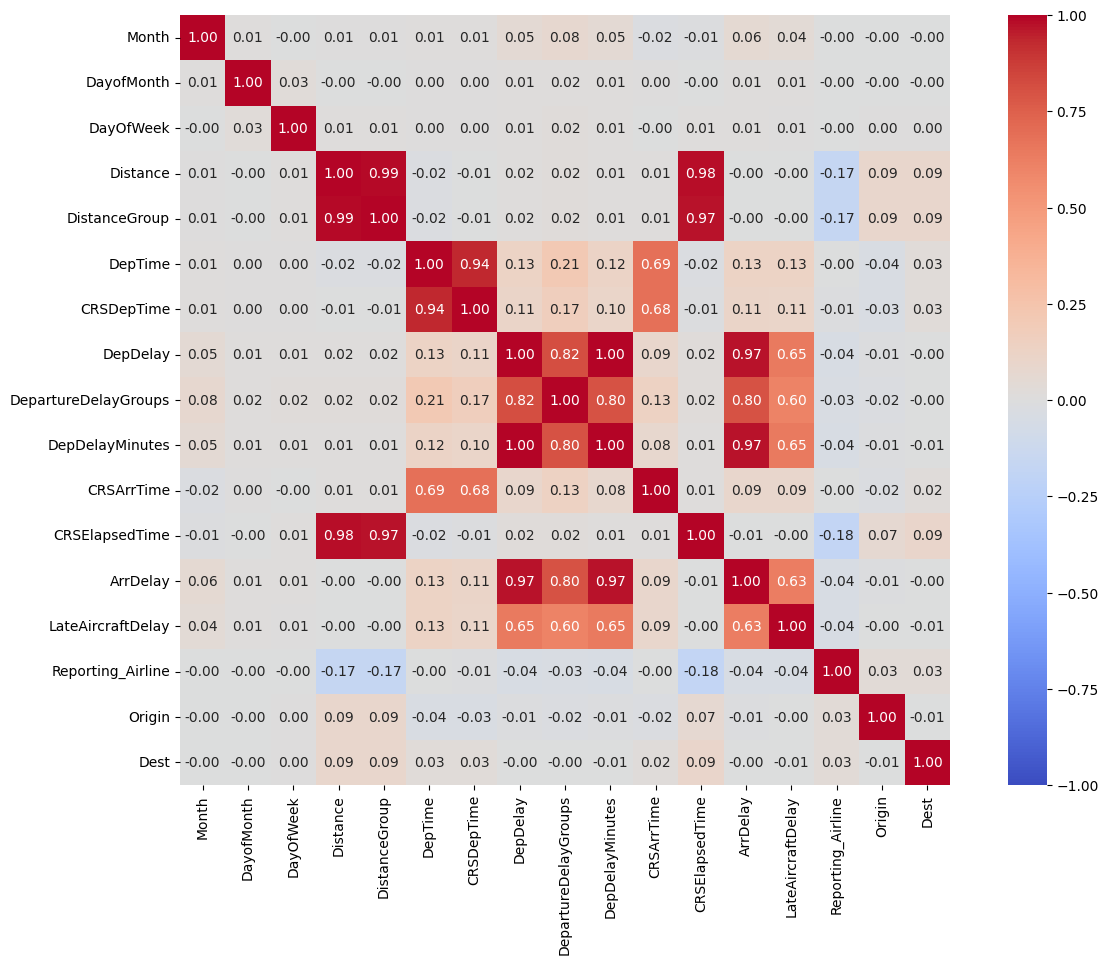

In [66]:
corrmat = arrDelay_df.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, vmin=-1, square=True, annot=True, fmt='.2f', cmap='coolwarm', center=0);

Ta loại bỏ các cột:
- Month, DayofMonth, DayOfWeek, Reporting_Airline, Origin, Dest bởi yếu tố tương quan kém, không tác động nhiều tới biến mục tiêu 


Chọn độ trễ đến (Arrival Delay) làm biến mục tiêu của mình vì một số lý do:
- Độ trễ đến ảnh hưởng trực tiếp đến hành khách và hoạt động của hãng hàng không, làm cho nó trở thành một chỉ số hiệu suất quan trọng.
- Dự đoán độ trễ đến có thể giúp các hãng hàng không và sân bay quản lý tốt hơn tài nguyên và kỳ vọng của hành khách.

## **Xử lý outliers**

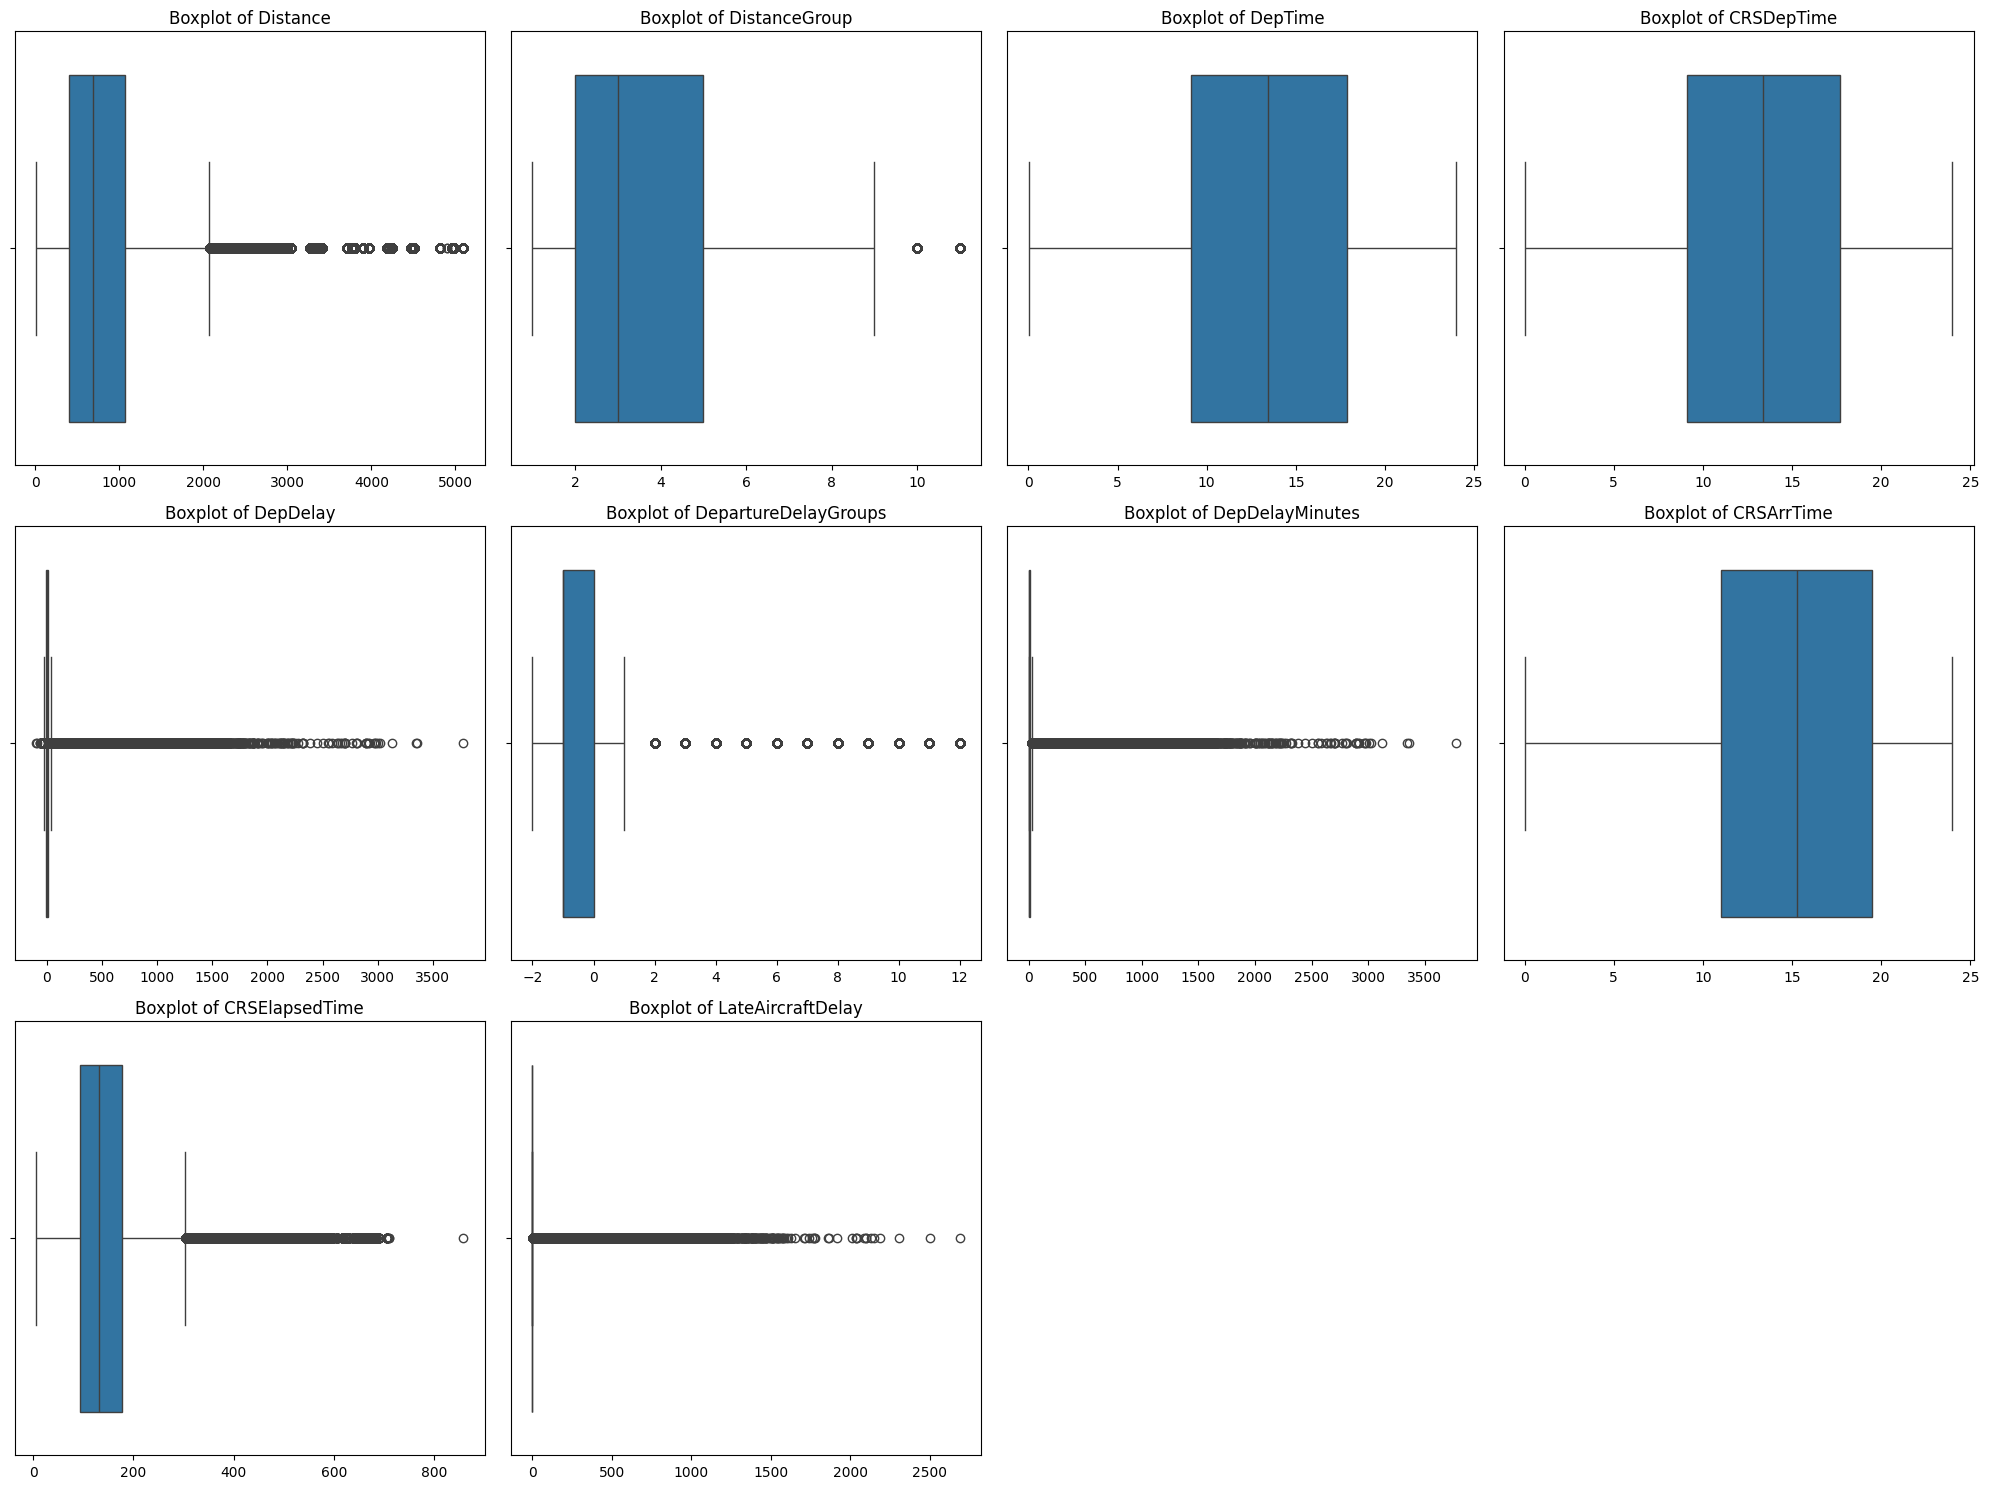

In [67]:
# Danh sách cột cần kiểm tra
columns = ['Distance', 'DistanceGroup', 'DepTime', 'CRSDepTime', 'DepDelay', 
           'DepartureDelayGroups', 'DepDelayMinutes', 'CRSArrTime', 'CRSElapsedTime', 'LateAircraftDelay']

# Thiết lập số hàng và cột
n_cols = 4
n_rows = len(columns) // n_cols + (len(columns) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.boxplot(data=arrDelay_df, x=col, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel("")

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [102]:
arrDelay_df_backup_1 = arrDelay_df.copy()


In [103]:
# Định nghĩa cột cần kiểm tra
columns = ['Distance', 'DistanceGroup', 'DepDelay', 'DepartureDelayGroups', 'DepDelayMinutes', 'CRSElapsedTime', 'LateAircraftDelay']

outliers_zscore = {}

# Kiểm tra các cột
for col in columns:
    # Tính Z-score cho cột
    mean = arrDelay_df_backup_1[col].mean()
    std_dev = arrDelay_df_backup_1[col].std()
    z_scores = (arrDelay_df_backup_1[col] - mean) / std_dev

    # Xác định ngoại lệ với Z-score > 3 hoặc Z-score < -3
    outliers = arrDelay_df_backup_1[np.abs(z_scores) > 3]  # Lọc các giá trị có Z-score > 3 hoặc < -3

    outliers_zscore[col] = len(outliers)

    # In ra kết quả cho từng cột
    if len(outliers) > 0:
        print(f"{col}: {len(outliers)} outliers based on Z-score")
    


Distance: 35274 outliers based on Z-score
DistanceGroup: 82461 outliers based on Z-score
DepDelay: 58906 outliers based on Z-score
DepartureDelayGroups: 140090 outliers based on Z-score
DepDelayMinutes: 58906 outliers based on Z-score
CRSElapsedTime: 55093 outliers based on Z-score
LateAircraftDelay: 66727 outliers based on Z-score


#### Thay thế outliers bằng trung bình

In [104]:
for col in columns:
    while True:
        # Tính giá trị trung bình và độ lệch chuẩn
        mean = arrDelay_df_backup_1[col].mean()
        std_dev = arrDelay_df_backup_1[col].std()

        # Tính z-score
        z_scores = (arrDelay_df_backup_1[col] - mean) / std_dev

        # Kiểm tra số lượng outliers
        num_outliers = (np.abs(z_scores) > 3).sum()
        if num_outliers == 0:
            break

        # Thay thế outliers bằng giá trị trung bình
        arrDelay_df_backup_1[col] = np.where(np.abs(z_scores) > 3, mean, arrDelay_df_backup_1[col])


Kiểm tra lại

In [105]:
# Kiểm tra các cột
for col in columns:
    # Tính Z-score cho cột
    mean = arrDelay_df_backup_1[col].mean()
    std_dev = arrDelay_df_backup_1[col].std()
    z_scores = (arrDelay_df_backup_1[col] - mean) / std_dev

    # Xác định ngoại lệ với Z-score > 3 hoặc Z-score < -3
    outliers = arrDelay_df_backup_1[np.abs(z_scores) > 3]  # Lọc các giá trị có Z-score > 3 hoặc < -3

    outliers_zscore[col] = len(outliers)

    # In ra kết quả cho từng cột
    if len(outliers) > 0:
        print(f"{col}: {len(outliers)} outliers based on Z-score")
    


### **Linear Regression Model**

In [127]:
# Lặp lại cho từng mẫu dữ liệu
pred_mse = []
pred_rmse = []
pred_mae = []
pred_r2 = []

for i in range(1, 5):
    # Lấy mẫu 100,000 hàng
    sampled_df = arrDelay_df_backup_1.sample(n=100000)

    # Dữ liệu đặc trưng (X) và nhãn (y)
    X = sampled_df[['Distance', 'DistanceGroup', 'DepTime', 'CRSDepTime', 'DepDelay', 
           'DepartureDelayGroups', 'DepDelayMinutes', 'CRSArrTime', 'CRSElapsedTime', 'LateAircraftDelay']]
    
    y = sampled_df['ArrDelay']

    # Chuẩn hóa dữ liệu X
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Chia tập train/test
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Huấn luyện mô hình
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Dự đoán
    y_pred = model.predict(X_test)

    # Đánh giá mô hình
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    pred_mse.append(mse)
    pred_rmse.append(rmse)
    pred_mae.append(mae)
    pred_r2.append(r2)

# Kết quả
print("Mean Squared Error: ", [float(x) for x in pred_mse])
print("Root Mean Squared Error: ", [float(x) for x in pred_rmse])
print("Mean Absolute Error: ", [float(x) for x in pred_mae])
print("R-squared: ", [float(x) for x in pred_r2])

print("\nMean of Mean Squared Error: ", np.mean(pred_mse))
print("Mean of Root Mean Squared Error: ", np.mean(pred_rmse))
print("Mean of Mean Absolute Error: ", np.mean(pred_mae))
print("Mean of R-squared: ", np.mean(pred_r2))


Mean Squared Error:  [2809.2524216871775, 2966.9563095952562, 3555.512616518822, 3626.246293263364]
Root Mean Squared Error:  [53.00238128317611, 54.46977427523687, 59.62811934413848, 60.21832190673669]
Mean Absolute Error:  [22.765936392717943, 22.50836164041042, 23.323706892474934, 23.189783070017683]
R-squared:  [0.2199841114175105, 0.21931044181180326, 0.18521110768175608, 0.1904403416904661]

Mean of Mean Squared Error:  3239.491910266155
Mean of Root Mean Squared Error:  56.82964920232204
Mean of Mean Absolute Error:  22.946946998905243
Mean of R-squared:  0.20373650065038398


#### Thay bằng giá trị biên

In [129]:
arrDelay_df_backup_2 = arrDelay_df.copy()

In [130]:
# Tính giá trị biên bằng cách sử dụng IQR
for col in columns:
    # Tính Q1 và Q3
    Q1 = arrDelay_df_backup_2[col].quantile(0.25)
    Q3 = arrDelay_df_backup_2[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Tính giới hạn dưới và giới hạn trên
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Thay thế các giá trị outliers bằng giới hạn
    arrDelay_df_backup_2[col] = np.where(arrDelay_df_backup_2[col] < lower_bound, lower_bound, arrDelay_df_backup_2[col])
    arrDelay_df_backup_2[col] = np.where(arrDelay_df_backup_2[col] > upper_bound, upper_bound, arrDelay_df_backup_2[col])

# Kiểm tra lại số lượng outliers sau khi thay bằng giá trị biên
for col in columns:
    mean = arrDelay_df_backup_2[col].mean()
    std_dev = arrDelay_df_backup_2[col].std()
    z_scores = (arrDelay_df_backup_2[col] - mean) / std_dev

    num_outliers = (np.abs(z_scores) > 3).sum()
    print(f"{col}: {num_outliers} outliers remain after replacing with boundary values")


Distance: 0 outliers remain after replacing with boundary values
DistanceGroup: 0 outliers remain after replacing with boundary values
DepDelay: 0 outliers remain after replacing with boundary values
DepartureDelayGroups: 0 outliers remain after replacing with boundary values
DepDelayMinutes: 0 outliers remain after replacing with boundary values
CRSElapsedTime: 0 outliers remain after replacing with boundary values
LateAircraftDelay: 0 outliers remain after replacing with boundary values


In [131]:
pred_mse = []
pred_rmse = []
pred_mae = []
pred_r2 = []

for i in range(1, 5):
    # Lấy mẫu 100,000 hàng
    sampled_df = arrDelay_df_backup_2.sample(n=100000)

    # Dữ liệu đặc trưng (X) và nhãn (y)
    X = sampled_df[['Distance', 'DistanceGroup', 'DepTime', 'CRSDepTime', 'DepDelay', 
           'DepartureDelayGroups', 'DepDelayMinutes', 'CRSArrTime', 'CRSElapsedTime', 'LateAircraftDelay']]
    
    y = sampled_df['ArrDelay']

    # Chuẩn hóa dữ liệu X
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Chia tập train/test
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Huấn luyện mô hình
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Dự đoán
    y_pred = model.predict(X_test)

    # Đánh giá mô hình
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    pred_mse.append(mse)
    pred_rmse.append(rmse)
    pred_mae.append(mae)
    pred_r2.append(r2)

# Kết quả
print("Mean Squared Error: ", [float(x) for x in pred_mse])
print("Root Mean Squared Error: ", [float(x) for x in pred_rmse])
print("Mean Absolute Error: ", [float(x) for x in pred_mae])
print("R-squared: ", [float(x) for x in pred_r2])

print("\nMean of Mean Squared Error: ", np.mean(pred_mse))
print("Mean of Root Mean Squared Error: ", np.mean(pred_rmse))
print("Mean of Mean Absolute Error: ", np.mean(pred_mae))
print("Mean of R-squared: ", np.mean(pred_r2))


Mean Squared Error:  [2640.096546259301, 2953.4062467579533, 2455.865671407804, 2818.966839905961]
Root Mean Squared Error:  [51.38186982058264, 54.345250452619624, 49.55669148972522, 53.0939435331937]
Mean Absolute Error:  [21.527335596975412, 21.00210379143554, 20.15458019363683, 21.02016164788908]
R-squared:  [0.3507527619044075, 0.3189022398951954, 0.3602573152864712, 0.3320504452034765]

Mean of Mean Squared Error:  2717.083826082755
Mean of Root Mean Squared Error:  52.0944388240303
Mean of Mean Absolute Error:  20.926045307484216
Mean of R-squared:  0.3404906905723877


### **Xây dựng mô hình không cần xử lý Outliers**

In [136]:
pred_mse = []
pred_rmse = []
pred_mae = []
pred_r2 = []

for i in range(1, 5):
    # Lấy mẫu 100,000 hàng
    sampled_df = arrDelay_df.sample(n=100000)

    # Dữ liệu đặc trưng (X) và nhãn (y)
    X = sampled_df[['Distance', 'DistanceGroup', 'DepTime', 'CRSDepTime', 'DepDelay', 
           'DepartureDelayGroups', 'DepDelayMinutes', 'CRSArrTime', 'CRSElapsedTime', 'LateAircraftDelay']]
    
    y = sampled_df['ArrDelay']

    # Chuẩn hóa dữ liệu X
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Chia tập train/test
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Huấn luyện mô hình
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Dự đoán
    y_pred = model.predict(X_test)

    # Đánh giá mô hình
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    pred_mse.append(mse)
    pred_rmse.append(rmse)
    pred_mae.append(mae)
    pred_r2.append(r2)

# Kết quả
print("Mean Squared Error: ", [float(x) for x in pred_mse])
print("Root Mean Squared Error: ", [float(x) for x in pred_rmse])
print("Mean Absolute Error: ", [float(x) for x in pred_mae])
print("R-squared: ", [float(x) for x in pred_r2])

print("\nMean of Mean Squared Error: ", np.mean(pred_mse))
print("Mean of Root Mean Squared Error: ", np.mean(pred_rmse))
print("Mean of Mean Absolute Error: ", np.mean(pred_mae))
print("Mean of R-squared: ", np.mean(pred_r2))



Mean Squared Error:  [199.03190989172467, 199.2553694609037, 204.4514215776528, 207.47724238092027]
Root Mean Squared Error:  [14.10786695045444, 14.115784408275145, 14.29865104048815, 14.404070340737727]
Mean Absolute Error:  [9.880567459939083, 9.790223122910081, 10.011284243639599, 9.874894675597892]
R-squared:  [0.9471742504820194, 0.9463980706939783, 0.9571885765842274, 0.9512298390837911]

Mean of Mean Squared Error:  202.55398582780037
Mean of Root Mean Squared Error:  14.231593184988865
Mean of Mean Absolute Error:  9.889242375521665
Mean of R-squared:  0.950497684211004


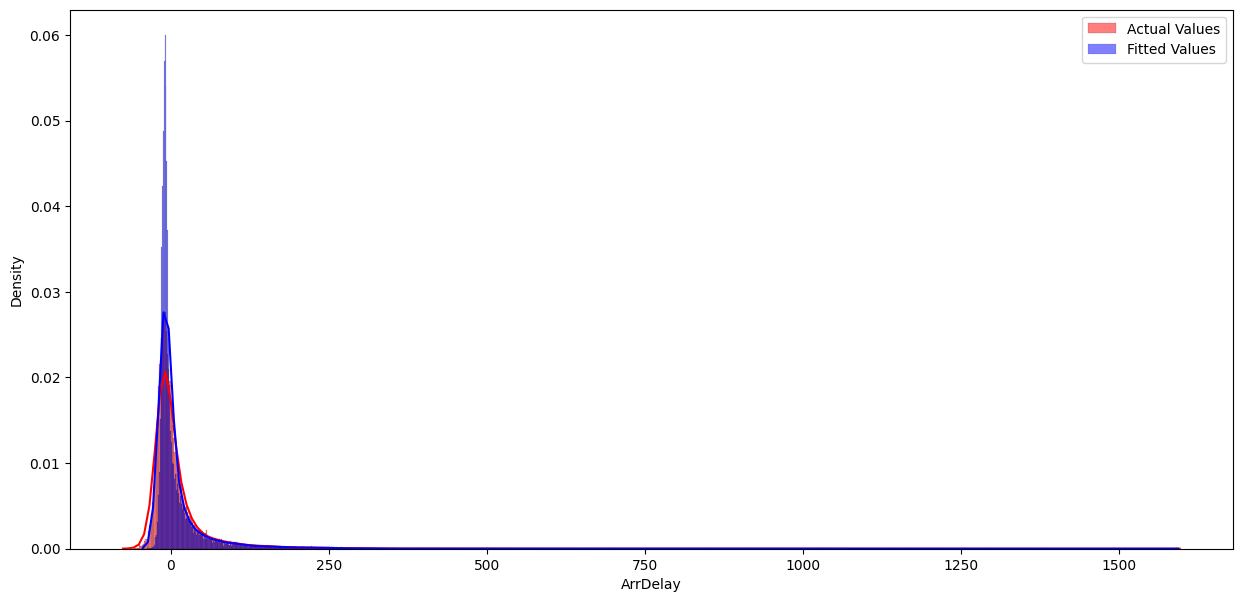

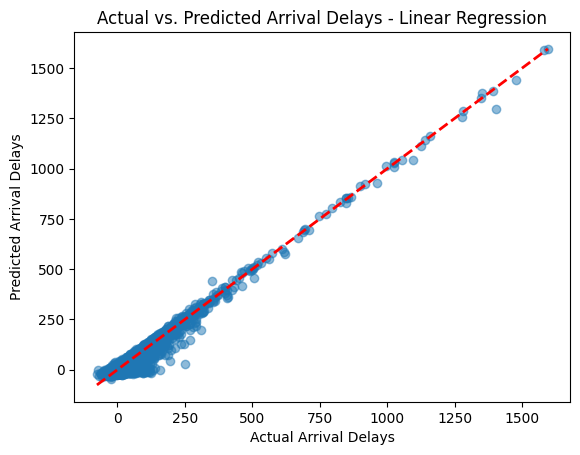

In [137]:
# Vẽ biểu đồ histogram so sánh phân phối giữa giá trị thực tế (y_test) và giá trị dự đoán (y_pred),
# sử dụng đường KDE để biểu diễn mật độ.
plt.figure(figsize=(15,7))
ax1 = sns.histplot(y_test, kde=True, stat="density", color='r', label='Actual Values')
sns.histplot(y_pred, kde=True, stat="density", color='b', label='Fitted Values', ax=ax1)
plt.legend()
plt.show()

# Biểu đồ tán xạ giữa giá trị thực tế và giá trị dự đoán
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Arrival Delays")
plt.ylabel("Predicted Arrival Delays")
plt.title("Actual vs. Predicted Arrival Delays - Linear Regression")

# Trực quan đường chéo trên biểu đồ scatter giữa giá trị thực tế (y_test) và giá trị dự đoán (y_pred),
# đây là một cách hữu ích để hình dung mức độ khớp của các dự đoán của mô hình so với giá trị thực tế
max_value = max(max(y_test), max(y_pred))
min_value = min(min(y_test), min(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', lw=2)

plt.show()

In [138]:
import joblib
# Lưu mô hình
joblib.dump(model, 'saved_model/linear_regression_model_2.joblib')
joblib.dump(scaler, 'saved_model/scaler_model_2.joblib')

print("\nMô hình đã được lưu thành công!")


Mô hình đã được lưu thành công!


### Kiểm tra trên tập Validate hoàn toàn khác để xem Mô hình có overfiting không

In [6]:
import joblib
from sklearn.metrics import r2_score

# Đọc dữ liệu từ file CSV
august_df = pd.read_csv('Dataset/August_2024.csv')

august_df['CRSDepTime'] = august_df['CRSDepTime'].apply(lambda x: validate_int2str(x))
august_df['DepTime'] = august_df['DepTime'].apply(lambda x: validate_int2str(x))
august_df['CRSArrTime'] = august_df.CRSArrTime.apply(lambda x: validate_int2str(x))

# Hàm xóa số 0 ở đầu chuỗi
def remove_zero(col):
    col_str = str(col)
    if col_str[0] == '0':
        return col_str[1:]
    else:
        return col_str

# Tiền xử lý dữ liệu
# Tạo các cột 'hours' và 'minutes' từ 'CRSDepTime', 'DepTime' và 'CRSArrTime'
august_df['hours'] = pd.to_datetime(august_df['CRSDepTime'].apply(lambda x: remove_zero(x))).dt.hour
august_df['minutes'] = pd.to_datetime(august_df['CRSDepTime'].apply(lambda x: remove_zero(x))).dt.minute / 60
august_df['CRSDepTime'] = august_df['hours'] + august_df['minutes']
august_df = august_df.drop(columns=['hours', 'minutes'])

august_df['hours'] = pd.to_datetime(august_df['DepTime'].apply(lambda x: remove_zero(x))).dt.hour
august_df['minutes'] = pd.to_datetime(august_df['DepTime'].apply(lambda x: remove_zero(x))).dt.minute / 60
august_df['DepTime'] = august_df['hours'] + august_df['minutes']
august_df = august_df.drop(columns=['hours', 'minutes'])

august_df['hours'] = pd.to_datetime(august_df['CRSArrTime'].apply(lambda x: remove_zero(x))).dt.hour
august_df['minutes'] = pd.to_datetime(august_df['CRSArrTime'].apply(lambda x: remove_zero(x))).dt.minute / 60
august_df['CRSArrTime'] = august_df['hours'] + august_df['minutes']
august_df = august_df.drop(columns=['hours', 'minutes'])

# Kiểm tra và xử lý giá trị null
august_df.fillna(value=0, axis=0, inplace=True)

# Chuyển đổi kiểu dữ liệu cho 'DayofMonth' và 'DayOfWeek'
august_df['DayofMonth'] = august_df['DayofMonth'].astype(float).astype(int)
august_df['DayOfWeek'] = august_df['DayOfWeek'].astype(float).astype(int)

# Chọn các cột đặc trưng và nhãn
colPred = ['Distance', 'DistanceGroup', 'DepTime', 'CRSDepTime', 'DepDelay', 
            'DepartureDelayGroups', 'DepDelayMinutes', 'CRSArrTime', 'CRSElapsedTime', 'LateAircraftDelay']
X = august_df[colPred]
y = august_df['ArrDelay']

# Chuẩn hóa dữ liệu
scaler = joblib.load('saved_model/scaler_model_2.joblib')  # Tải scaler đã lưu
X_scaled = scaler.transform(X)

# Tải mô hình đã lưu
model = joblib.load('saved_model/linear_regression_model_2.joblib')

# Dự đoán với mô hình đã tải
y_pred = model.predict(X_scaled)

# Tính độ chính xác R²
r2 = r2_score(y, y_pred)

# In ra độ chính xác
print(f"Độ chính xác của mô hình (R²): {r2 * 100:.2f}%")


Độ chính xác của mô hình (R²): 93.72%


Mean Squared Error:  [215.19046809196627, 224.25176598344328, 207.9343136546085, 207.52392684808802]
Root Mean Squared Error:  [14.669371768823853, 14.975038096226777, 14.419927657745323, 14.405690779969145]
Mean Absolute Error:  [10.12836328313492, 10.184444465674602, 10.026956489682542, 10.123583001406928]
R-squared:  [0.9379961975770739, 0.9429043495843382, 0.9421002273684784, 0.94469017687645]
Mean of Mean Squared Error:  213.7251186445265
Mean of Root Mean Squared Error:  14.617507075691275
Mean of Mean Absolute Error:  10.115836809974748
Mean of R-squared:  0.9419227378515851


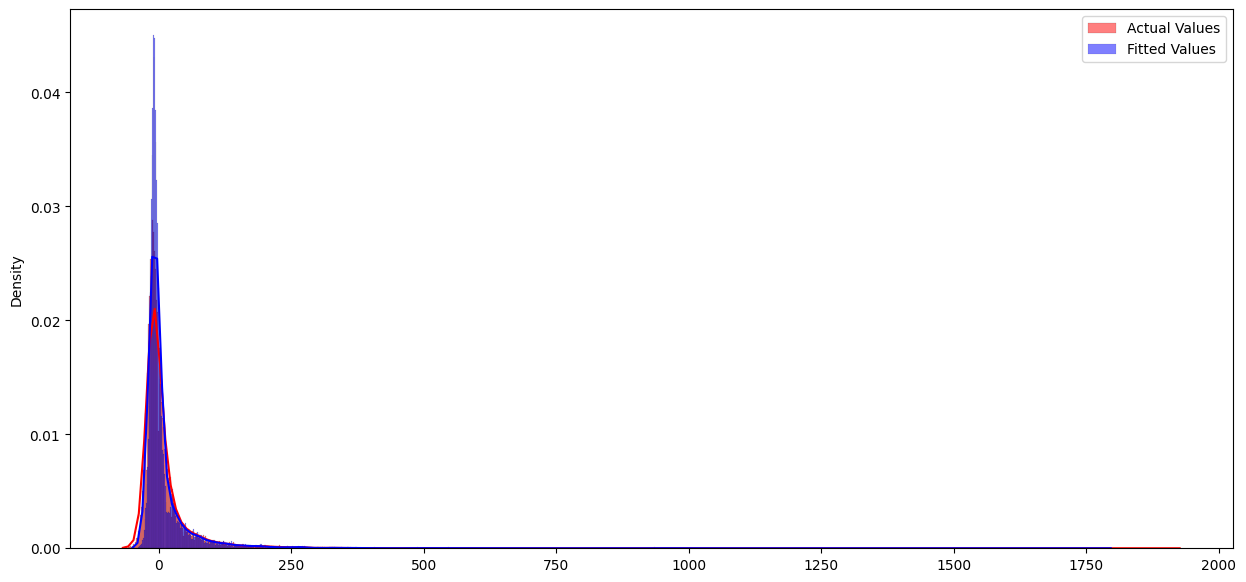

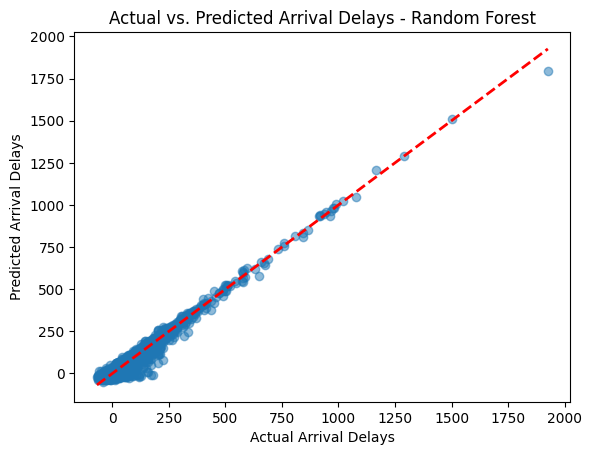

In [69]:
pred_mse = []
pred_rmse = []
pred_mae = []
pred_r2 = []

for i in range(1,5):
  sampled_df = arrDelay_df.sample(n=100000)

  X = np.array(sampled_df[['Distance', 'DistanceGroup', 'DepTime', 'CRSDepTime', 'DepDelay', 'DepartureDelayGroups', 'DepDelayMinutes', 'CRSArrTime', 'CRSElapsedTime', 'LateAircraftDelay']])
  y = np.array(sampled_df['ArrDelay'])

  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

  model = RandomForestRegressor(n_estimators=100, random_state=42)
  model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Evaluate the model
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  pred_mse.append(mse)
  pred_rmse.append(rmse)
  pred_mae.append(mae)
  pred_r2.append(r2)


print("Mean Squared Error: ", pred_mse)
print("Root Mean Squared Error: ", pred_rmse)
print("Mean Absolute Error: ", pred_mae)
print("R-squared: ", pred_r2)

print("Mean of Mean Squared Error: ", np.mean(pred_mse))
print("Mean of Root Mean Squared Error: ", np.mean(pred_rmse))
print("Mean of Mean Absolute Error: ", np.mean(pred_mae))
print("Mean of R-squared: ", np.mean(pred_r2))

# The code creates a plot using seaborn library to visualize the distribution of actual and predicted values of a regression model, where y_test and y_pred are the actual and predicted values, respectively.
plt.figure(figsize=(15,7))
ax1 = sns.histplot(y_test, kde=True, stat="density", color='r', label='Actual Values')
sns.histplot(y_pred, kde=True, stat="density", color='b', label='Fitted Values', ax=ax1)
plt.legend()
plt.show()

# The below plot shows a Scatter plot of actual vs. predicted values of arrival delays
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Arrival Delays")
plt.ylabel("Predicted Arrival Delays")
plt.title("Actual vs. Predicted Arrival Delays - Random Forest")

# Add a diagonal line to represent perfect predictions
max_value = max(max(y_test), max(y_pred))
min_value = min(min(y_test), min(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', lw=2)

plt.show()

In [71]:

joblib.dump(model, 'saved_model/random_forest_model.joblib')
joblib.dump(scaler, 'saved_model/scaler_random_forest_model.joblib')

print("\nMô hình đã được lưu thành công!")


Mô hình đã được lưu thành công!
